In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from textwrap import wrap
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Balancing

stage1: Data balanced based on Gender


stage2: Data balanced based on Educational Qualification

In [2]:
data = pd.read_csv('/content/data_balanced.csv')
data.head()

,Age,Area of Residence,Educational Qualification,What is your Annual Income?,"On average, how much of your monthly income do you allocate towards purchasing food?",What factors influence your decision to choose locally sourced food products? (Select all that apply),"Do you follow any specific dietary restrictions or guidelines (e.g., vegetarian, vegan, gluten-free)?",How often do you feel that the food you have access to is of poor quality or has insufficient nutritional value?,How frequently do you skip meals due to financial constraints or lack of access to food?,Have you or your family members ever benefited from government food assistance programs such as the Public Distribution System (PDS) or the Mid-Day Meal Scheme?,...,Would you be comfortable using blockchain technology to track the origin and sustainability of food products?,How often do you use food tracking or calorie counting apps to monitor your dietary intake?,Do you believe that technology has positively or negatively impacted people's overall relationship with food?,"How often do you engage with food-related content on streaming platforms (e.g., cooking shows, food documentaries)?","How often do you use technology (e.g., smart kitchen appliances, cooking apps) to assist you in meal preparation or cooking?",How knowledgeable do you feel about the connection between nutrition and mental health?,Do you believe there is a stigma associated with talking about food insecurity or mental health?,"Have you ever sought professional help or counseling for mental health concerns related to food, such as disordered eating or emotional eating?",Do you think mental health support services should include resources or programs specifically addressing the relationship between food and mental well-being?,Gender
0,21,Urban,Bachelor's Degree,INR 1-5 Lakhs,More than 40%,Quality,Yes (Strictly),Rarely or Never,Never,No,...,Yes,Rarely,Negatively,Occasionally,Rarely,Not knowledgeable at all,Yes,No,Agree,Female
1,21,Semi Urban,High School,None as of now (Student),Less than 10%,"Price, Quality, Health Benefits, Environmental...",Yes (Strictly),Rarely or Never,Never,No,...,Yes,Rarely,Negatively,Occasionally,Occasionally,Somewhat knowledgeable,No,No,Neutral,Male
2,19,Urban,"High school graduate, diploma or the equivalent",None as of now (Student),10% - 20%,Quality,No,Rarely or Never,Never,No,...,Yes,Never,Negatively,Several times a week,Rarely,Somewhat knowledgeable,Yes,No,Strongly agree,Male
3,20,Urban,Bachelor's Degree,None as of now (Student),20% - 30%,Price,Yes (Sometimes),Often,Sometimes,No,...,Yes,Occasionally,Negatively,Occasionally,Rarely,Slightly knowledgeable,No,No,Neutral,Male
4,21,Urban,"High school graduate, diploma or the equivalent",None as of now (Student),10% - 20%,"Price, Quality, Supporting Local Farmers",No,Sometimes,Rarely,No,...,Yes,Several times a week,Positively,Occasionally,Several times a week,Somewhat knowledgeable,Yes,No,Agree,Male


In [3]:
# @title
# Create a copy of the dataset to avoid overwriting the original data
data_numerical = data.copy()

# Identify all categorical columns
categorical_columns = data_numerical.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    data_numerical[column] = le.fit_transform(data_numerical[column])

# Check the first few rows of the transformed data
data_numerical = data_numerical[data_numerical['Educational Qualification'] != 4]
data_numerical.head()

,Age,Area of Residence,Educational Qualification,What is your Annual Income?,"On average, how much of your monthly income do you allocate towards purchasing food?",What factors influence your decision to choose locally sourced food products? (Select all that apply),"Do you follow any specific dietary restrictions or guidelines (e.g., vegetarian, vegan, gluten-free)?",How often do you feel that the food you have access to is of poor quality or has insufficient nutritional value?,How frequently do you skip meals due to financial constraints or lack of access to food?,Have you or your family members ever benefited from government food assistance programs such as the Public Distribution System (PDS) or the Mid-Day Meal Scheme?,...,Would you be comfortable using blockchain technology to track the origin and sustainability of food products?,How often do you use food tracking or calorie counting apps to monitor your dietary intake?,Do you believe that technology has positively or negatively impacted people's overall relationship with food?,"How often do you engage with food-related content on streaming platforms (e.g., cooking shows, food documentaries)?","How often do you use technology (e.g., smart kitchen appliances, cooking apps) to assist you in meal preparation or cooking?",How knowledgeable do you feel about the connection between nutrition and mental health?,Do you believe there is a stigma associated with talking about food insecurity or mental health?,"Have you ever sought professional help or counseling for mental health concerns related to food, such as disordered eating or emotional eating?",Do you think mental health support services should include resources or programs specifically addressing the relationship between food and mental well-being?,Gender
0,21,3,0,0,4,17,2,3,0,0,...,1,3,0,2,3,1,1,0,0,0
1,21,2,2,4,3,11,2,3,0,0,...,1,3,0,2,2,3,0,0,2,1
2,19,3,3,4,0,17,0,3,0,0,...,1,1,0,4,3,3,1,0,3,1
3,20,3,0,4,1,4,1,2,3,0,...,1,2,0,2,3,2,0,0,2,1
4,21,3,3,4,0,14,0,4,2,0,...,1,4,2,2,4,3,1,0,0,1


In [4]:
# Assuming 'TargetColumn' is your label column (class labels) and 'data_numerical' is the feature set

# Step 1: Separate features and target
X = data_numerical.drop('Educational Qualification', axis=1)  # Replace 'TargetColumn' with the name of your target
y = data_numerical['Educational Qualification']

# Step 2: Check the original class distribution
print("Original class distribution:", Counter(y))

# Step 3: Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 4: Check the new class distribution after resampling
print("New class distribution after SMOTE:", Counter(y_resampled))

# Step 5: Convert back to DataFrame (optional)
data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Educational Qualification'])], axis=1)

# Step 6: Display the first few rows of the resampled data
data_resampled.head()


Original class distribution: Counter({0: 71, 2: 40, 3: 37, 1: 15})
New class distribution after SMOTE: Counter({0: 71, 2: 71, 3: 71, 1: 71})


,Age,Area of Residence,What is your Annual Income?,"On average, how much of your monthly income do you allocate towards purchasing food?",What factors influence your decision to choose locally sourced food products? (Select all that apply),"Do you follow any specific dietary restrictions or guidelines (e.g., vegetarian, vegan, gluten-free)?",How often do you feel that the food you have access to is of poor quality or has insufficient nutritional value?,How frequently do you skip meals due to financial constraints or lack of access to food?,Have you or your family members ever benefited from government food assistance programs such as the Public Distribution System (PDS) or the Mid-Day Meal Scheme?,"How often do you participate in community events or activities related to food (e.g., food drives, community meals)?",...,How often do you use food tracking or calorie counting apps to monitor your dietary intake?,Do you believe that technology has positively or negatively impacted people's overall relationship with food?,"How often do you engage with food-related content on streaming platforms (e.g., cooking shows, food documentaries)?","How often do you use technology (e.g., smart kitchen appliances, cooking apps) to assist you in meal preparation or cooking?",How knowledgeable do you feel about the connection between nutrition and mental health?,Do you believe there is a stigma associated with talking about food insecurity or mental health?,"Have you ever sought professional help or counseling for mental health concerns related to food, such as disordered eating or emotional eating?",Do you think mental health support services should include resources or programs specifically addressing the relationship between food and mental well-being?,Gender,Educational Qualification
0,21,3,0,4,17,2,3,0,0,3,...,3,0,2,3,1,1,0,0,0,0
1,21,2,4,3,11,2,3,0,0,1,...,3,0,2,2,3,0,0,2,1,2
2,19,3,4,0,17,0,3,0,0,1,...,1,0,4,3,3,1,0,3,1,3
3,20,3,4,1,4,1,2,3,0,2,...,2,0,2,3,2,0,0,2,1,0
4,21,3,4,0,14,0,4,2,0,4,...,4,2,2,4,3,1,0,0,1,3


In [5]:
# Assuming 'data_numerical' is your DataFrame with the Gender column

# Step 1: Pop the 'Gender' column (remove it temporarily)
gender_column = data.pop('Educational Qualification')

# Step 2: Insert the 'Gender' column at the last position
data['Educational Qualification'] = gender_column

# Step 3: Display the updated DataFrame to verify
data.head()


,Age,Area of Residence,What is your Annual Income?,"On average, how much of your monthly income do you allocate towards purchasing food?",What factors influence your decision to choose locally sourced food products? (Select all that apply),"Do you follow any specific dietary restrictions or guidelines (e.g., vegetarian, vegan, gluten-free)?",How often do you feel that the food you have access to is of poor quality or has insufficient nutritional value?,How frequently do you skip meals due to financial constraints or lack of access to food?,Have you or your family members ever benefited from government food assistance programs such as the Public Distribution System (PDS) or the Mid-Day Meal Scheme?,"How often do you participate in community events or activities related to food (e.g., food drives, community meals)?",...,How often do you use food tracking or calorie counting apps to monitor your dietary intake?,Do you believe that technology has positively or negatively impacted people's overall relationship with food?,"How often do you engage with food-related content on streaming platforms (e.g., cooking shows, food documentaries)?","How often do you use technology (e.g., smart kitchen appliances, cooking apps) to assist you in meal preparation or cooking?",How knowledgeable do you feel about the connection between nutrition and mental health?,Do you believe there is a stigma associated with talking about food insecurity or mental health?,"Have you ever sought professional help or counseling for mental health concerns related to food, such as disordered eating or emotional eating?",Do you think mental health support services should include resources or programs specifically addressing the relationship between food and mental well-being?,Gender,Educational Qualification
0,21,Urban,INR 1-5 Lakhs,More than 40%,Quality,Yes (Strictly),Rarely or Never,Never,No,Rarely,...,Rarely,Negatively,Occasionally,Rarely,Not knowledgeable at all,Yes,No,Agree,Female,Bachelor's Degree
1,21,Semi Urban,None as of now (Student),Less than 10%,"Price, Quality, Health Benefits, Environmental...",Yes (Strictly),Rarely or Never,Never,No,Never,...,Rarely,Negatively,Occasionally,Occasionally,Somewhat knowledgeable,No,No,Neutral,Male,High School
2,19,Urban,None as of now (Student),10% - 20%,Quality,No,Rarely or Never,Never,No,Never,...,Never,Negatively,Several times a week,Rarely,Somewhat knowledgeable,Yes,No,Strongly agree,Male,"High school graduate, diploma or the equivalent"
3,20,Urban,None as of now (Student),20% - 30%,Price,Yes (Sometimes),Often,Sometimes,No,Often,...,Occasionally,Negatively,Occasionally,Rarely,Slightly knowledgeable,No,No,Neutral,Male,Bachelor's Degree
4,21,Urban,None as of now (Student),10% - 20%,"Price, Quality, Supporting Local Farmers",No,Sometimes,Rarely,No,Sometimes,...,Several times a week,Positively,Occasionally,Several times a week,Somewhat knowledgeable,Yes,No,Agree,Male,"High school graduate, diploma or the equivalent"


In [6]:
# Assuming 'data_numerical' is the DataFrame with label-encoded columns
# and 'data' is the original DataFrame with categorical values

# Step 1: Initialize the LabelEncoder again
le = LabelEncoder()

# Step 2: Reverse label encoding for each column that was encoded
for column in categorical_columns:
    # Fit the LabelEncoder on the original column (before encoding)
    le.fit(data[column])  # Use the original categorical data for fitting

    # Inverse transform the label-encoded column back to original categories
    data_resampled[column] = le.inverse_transform(data_resampled[column])

# Step 3: Display the first few rows of the data to verify
data_resampled.head()

,Age,Area of Residence,What is your Annual Income?,"On average, how much of your monthly income do you allocate towards purchasing food?",What factors influence your decision to choose locally sourced food products? (Select all that apply),"Do you follow any specific dietary restrictions or guidelines (e.g., vegetarian, vegan, gluten-free)?",How often do you feel that the food you have access to is of poor quality or has insufficient nutritional value?,How frequently do you skip meals due to financial constraints or lack of access to food?,Have you or your family members ever benefited from government food assistance programs such as the Public Distribution System (PDS) or the Mid-Day Meal Scheme?,"How often do you participate in community events or activities related to food (e.g., food drives, community meals)?",...,How often do you use food tracking or calorie counting apps to monitor your dietary intake?,Do you believe that technology has positively or negatively impacted people's overall relationship with food?,"How often do you engage with food-related content on streaming platforms (e.g., cooking shows, food documentaries)?","How often do you use technology (e.g., smart kitchen appliances, cooking apps) to assist you in meal preparation or cooking?",How knowledgeable do you feel about the connection between nutrition and mental health?,Do you believe there is a stigma associated with talking about food insecurity or mental health?,"Have you ever sought professional help or counseling for mental health concerns related to food, such as disordered eating or emotional eating?",Do you think mental health support services should include resources or programs specifically addressing the relationship between food and mental well-being?,Gender,Educational Qualification
0,21,Urban,INR 1-5 Lakhs,More than 40%,Quality,Yes (Strictly),Rarely or Never,Never,No,Rarely,...,Rarely,Negatively,Occasionally,Rarely,Not knowledgeable at all,Yes,No,Agree,Female,Bachelor's Degree
1,21,Semi Urban,None as of now (Student),Less than 10%,"Price, Quality, Health Benefits, Environmental...",Yes (Strictly),Rarely or Never,Never,No,Never,...,Rarely,Negatively,Occasionally,Occasionally,Somewhat knowledgeable,No,No,Neutral,Male,High School
2,19,Urban,None as of now (Student),10% - 20%,Quality,No,Rarely or Never,Never,No,Never,...,Never,Negatively,Several times a week,Rarely,Somewhat knowledgeable,Yes,No,Strongly agree,Male,"High school graduate, diploma or the equivalent"
3,20,Urban,None as of now (Student),20% - 30%,Price,Yes (Sometimes),Often,Sometimes,No,Often,...,Occasionally,Negatively,Occasionally,Rarely,Slightly knowledgeable,No,No,Neutral,Male,Bachelor's Degree
4,21,Urban,None as of now (Student),10% - 20%,"Price, Quality, Supporting Local Farmers",No,Sometimes,Rarely,No,Sometimes,...,Several times a week,Positively,Occasionally,Several times a week,Somewhat knowledgeable,Yes,No,Agree,Male,"High school graduate, diploma or the equivalent"


In [7]:
data_resampled.to_csv('data_balanced2.csv')

In [8]:
data = pd.read_csv('/content/data_balanced2.csv')
data = data.drop(data.columns[0], axis=1)
data.head()

,Age,Area of Residence,What is your Annual Income?,"On average, how much of your monthly income do you allocate towards purchasing food?",What factors influence your decision to choose locally sourced food products? (Select all that apply),"Do you follow any specific dietary restrictions or guidelines (e.g., vegetarian, vegan, gluten-free)?",How often do you feel that the food you have access to is of poor quality or has insufficient nutritional value?,How frequently do you skip meals due to financial constraints or lack of access to food?,Have you or your family members ever benefited from government food assistance programs such as the Public Distribution System (PDS) or the Mid-Day Meal Scheme?,"How often do you participate in community events or activities related to food (e.g., food drives, community meals)?",...,How often do you use food tracking or calorie counting apps to monitor your dietary intake?,Do you believe that technology has positively or negatively impacted people's overall relationship with food?,"How often do you engage with food-related content on streaming platforms (e.g., cooking shows, food documentaries)?","How often do you use technology (e.g., smart kitchen appliances, cooking apps) to assist you in meal preparation or cooking?",How knowledgeable do you feel about the connection between nutrition and mental health?,Do you believe there is a stigma associated with talking about food insecurity or mental health?,"Have you ever sought professional help or counseling for mental health concerns related to food, such as disordered eating or emotional eating?",Do you think mental health support services should include resources or programs specifically addressing the relationship between food and mental well-being?,Gender,Educational Qualification
0,21,Urban,INR 1-5 Lakhs,More than 40%,Quality,Yes (Strictly),Rarely or Never,Never,No,Rarely,...,Rarely,Negatively,Occasionally,Rarely,Not knowledgeable at all,Yes,No,Agree,Female,Bachelor's Degree
1,21,Semi Urban,None as of now (Student),Less than 10%,"Price, Quality, Health Benefits, Environmental...",Yes (Strictly),Rarely or Never,Never,No,Never,...,Rarely,Negatively,Occasionally,Occasionally,Somewhat knowledgeable,No,No,Neutral,Male,High School
2,19,Urban,None as of now (Student),10% - 20%,Quality,No,Rarely or Never,Never,No,Never,...,Never,Negatively,Several times a week,Rarely,Somewhat knowledgeable,Yes,No,Strongly agree,Male,"High school graduate, diploma or the equivalent"
3,20,Urban,None as of now (Student),20% - 30%,Price,Yes (Sometimes),Often,Sometimes,No,Often,...,Occasionally,Negatively,Occasionally,Rarely,Slightly knowledgeable,No,No,Neutral,Male,Bachelor's Degree
4,21,Urban,None as of now (Student),10% - 20%,"Price, Quality, Supporting Local Farmers",No,Sometimes,Rarely,No,Sometimes,...,Several times a week,Positively,Occasionally,Several times a week,Somewhat knowledgeable,Yes,No,Agree,Male,"High school graduate, diploma or the equivalent"


# Demographic Statistics

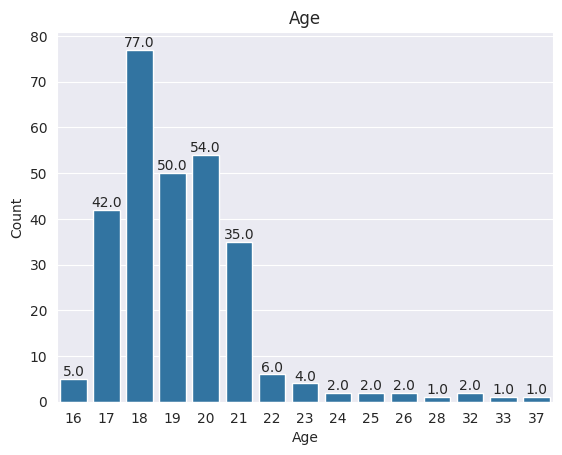

In [9]:
# plt.figure(figsize=(10, 6))
ax=sns.countplot(data=data, x='Age')
# Add count values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

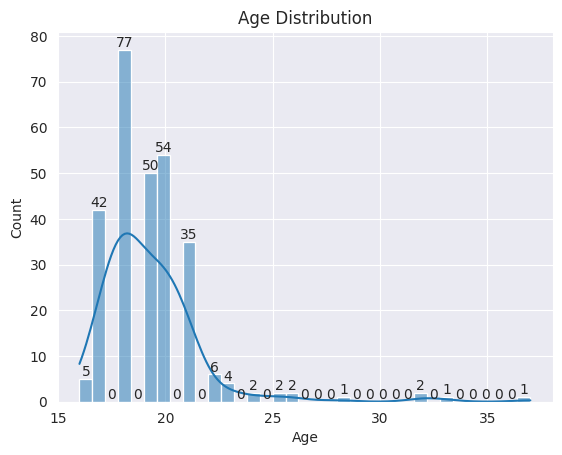

In [10]:
# plt.figure(figsize=(10, 6))
ax=sns.histplot(data=data, x='Age',kde=True)
# Add count values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [11]:
data1 = data
df = pd.DataFrame(data1)
df.describe()

,Age
count,284.000000
mean,19.299296
std,2.476433
min,16.000000
25%,18.000000
50%,19.000000
75%,20.000000
max,37.000000


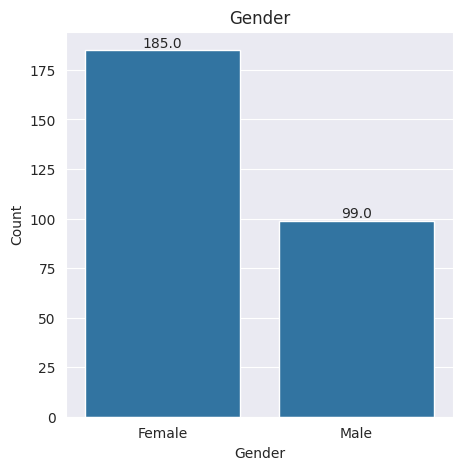

In [12]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=data, x='Gender')
# Add count values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

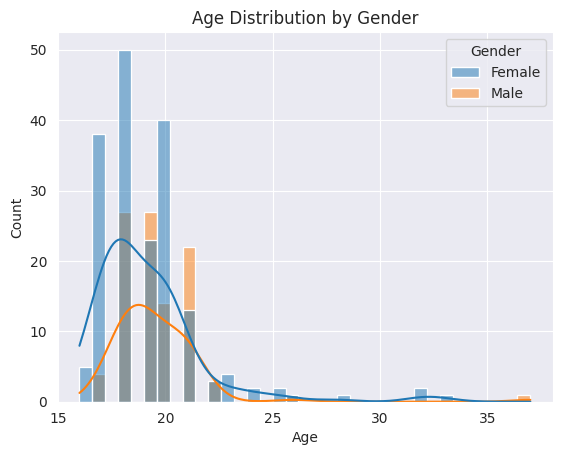

In [13]:
# plt.figure(figsize=(10, 6))
sns.histplot(data, x='Age', hue='Gender', kde=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

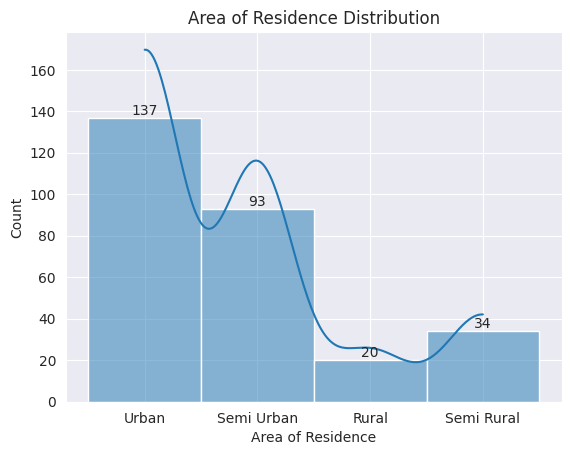

In [14]:
# plt.figure(figsize=(10, 6))
ax=sns.histplot(data, x='Area of Residence', kde=True)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
plt.title('Area of Residence Distribution')
plt.xlabel('Area of Residence')
plt.ylabel('Count')
plt.show()

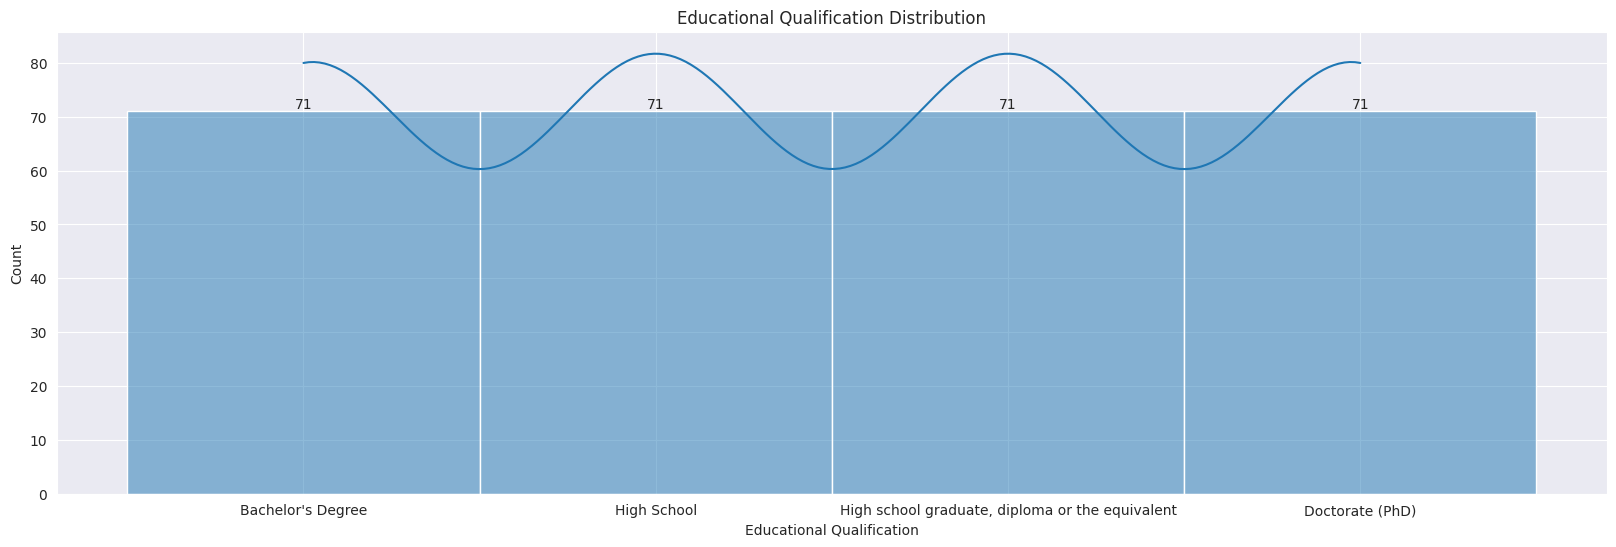

In [15]:
plt.figure(figsize=(20, 6))
ax=sns.histplot(data, x='Educational Qualification', kde=True)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
plt.title('Educational Qualification Distribution')
plt.xlabel('Educational Qualification')
plt.ylabel('Count')
plt.show()

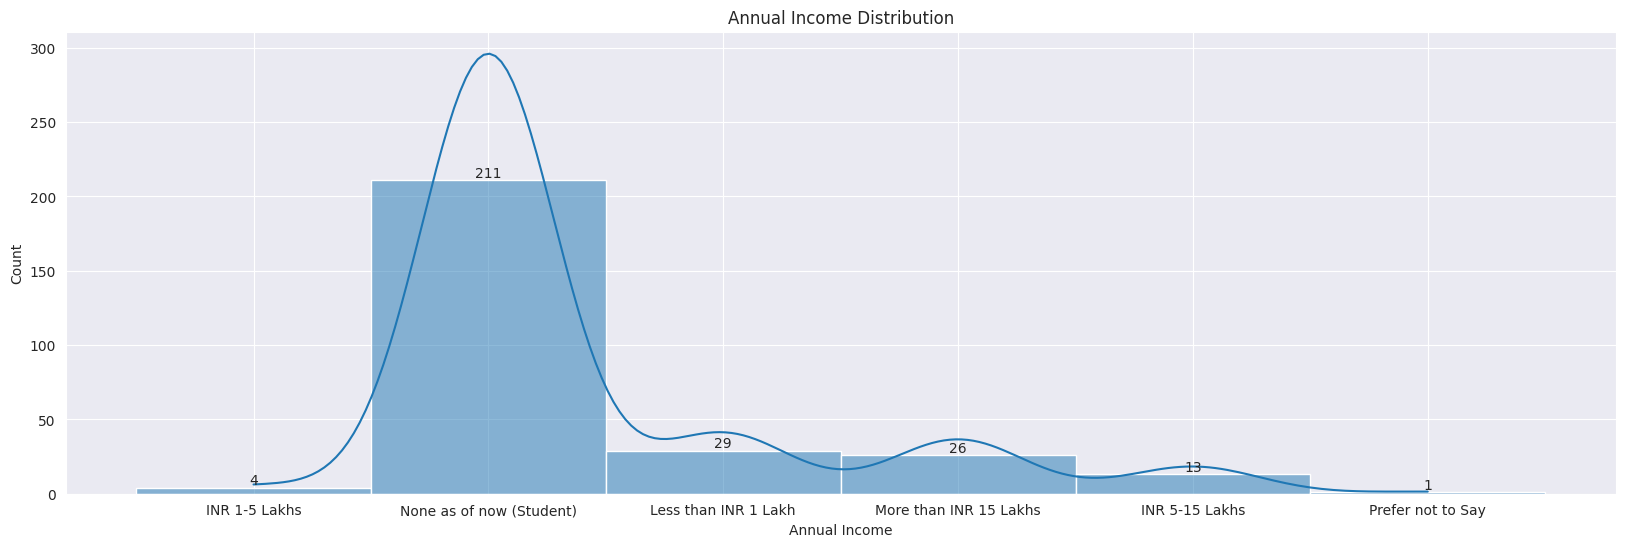

In [16]:
plt.figure(figsize=(20, 6))
ax=sns.histplot(data, x='What is your Annual Income?', kde=True)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

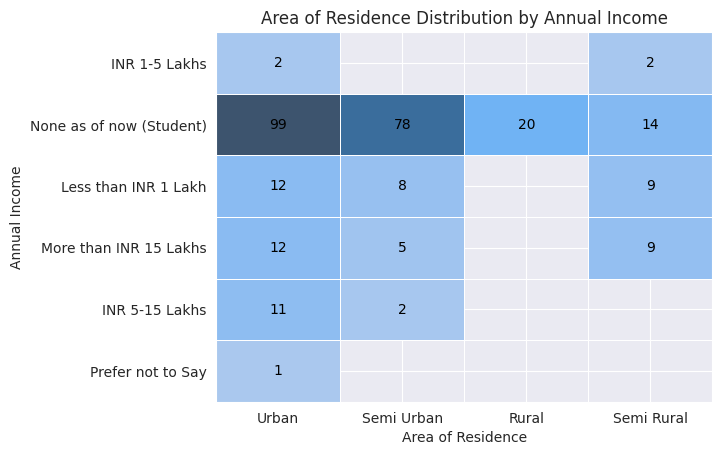

In [17]:
ax = sns.histplot(data, x='Area of Residence', y='What is your Annual Income?', edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
# Add lines between cells
for p in ax.patches:
    plt.gca().add_patch(plt.Rectangle(
        (p.get_x(), p.get_y()),
        p.get_width(),
        p.get_height(),
        fill=False,
        edgecolor='black',  # You can change the color
        linewidth=0.5  # Adjust the line width
    ))

ax.margins(x=0, y=0)  # remove unneeded whitespace
# plt.tight_layout()
plt.title('Area of Residence Distribution by Annual Income')
plt.xlabel('Area of Residence')
plt.ylabel('Annual Income')
plt.show()

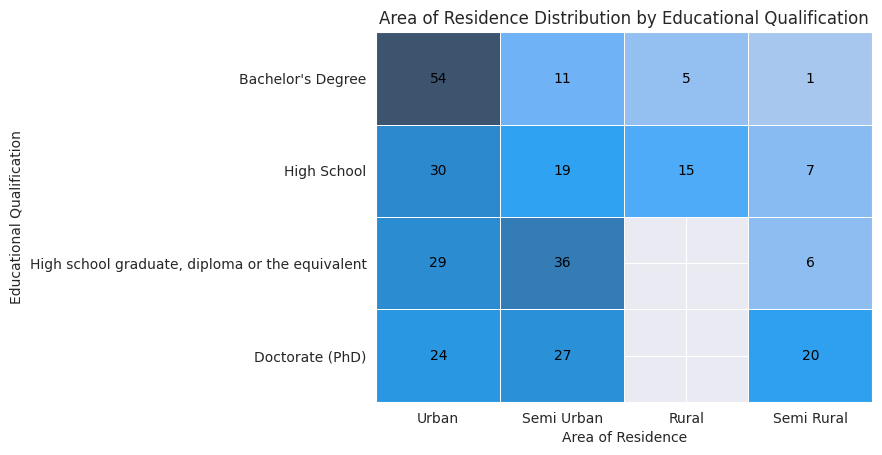

In [18]:
ax = sns.histplot(data, x='Area of Residence', y='Educational Qualification', cbar=False, edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
# plt.tight_layout()
plt.title('Area of Residence Distribution by Educational Qualification')
plt.xlabel('Area of Residence')
plt.ylabel('Educational Qualification')
plt.show()

# Economical Analysis

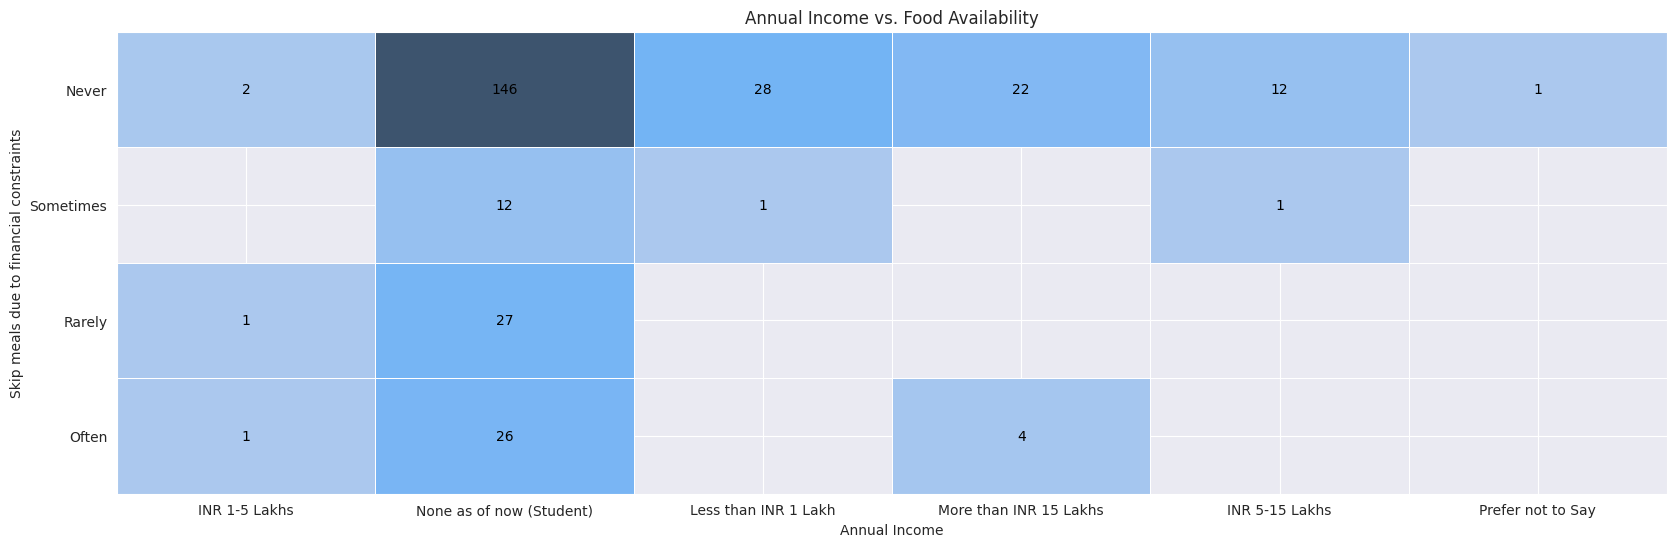

In [19]:
plt.figure(figsize=(20, 6))
ax=sns.histplot(data, x='What is your Annual Income?', y='How frequently do you skip meals due to financial constraints or lack of access to food?',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
plt.title('Annual Income vs. Food Availability')
plt.xlabel('Annual Income')
plt.ylabel('Skip meals due to financial constraints')
plt.show()

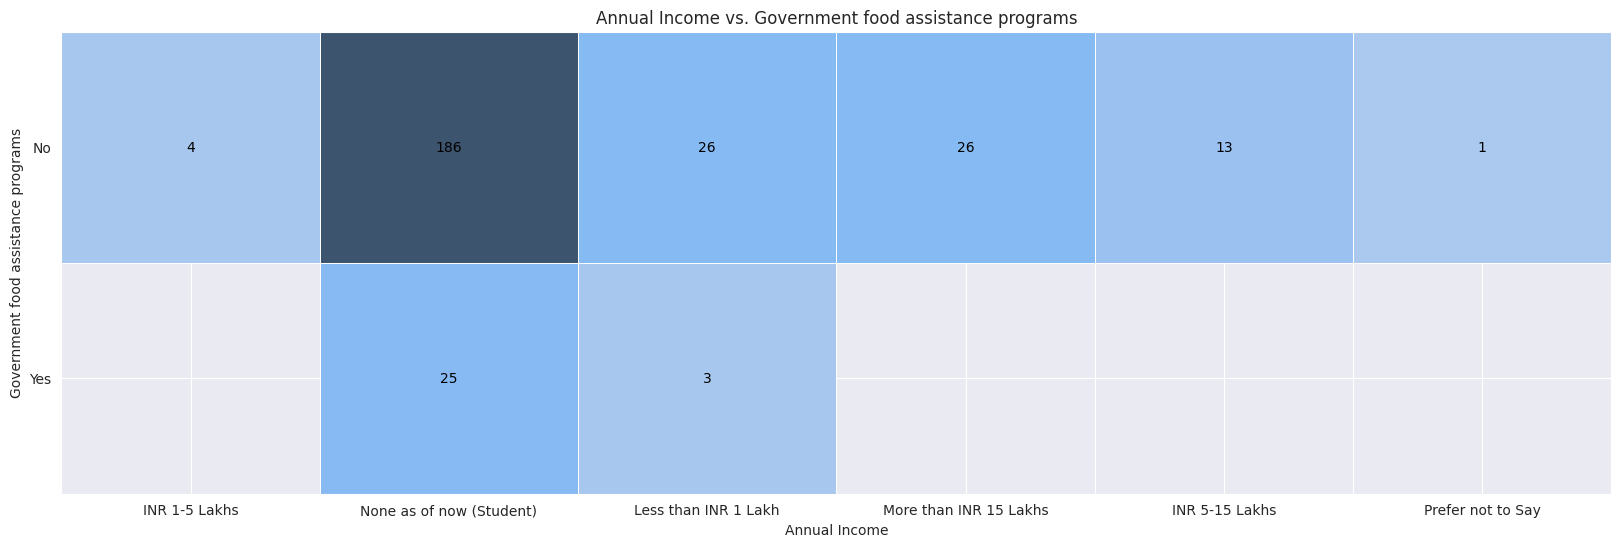

In [20]:
plt.figure(figsize=(20, 6))
ax=sns.histplot(data, x='What is your Annual Income?', y='Have you or your family members ever benefited from government food assistance programs such as the Public Distribution System (PDS) or the Mid-Day Meal Scheme?',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
plt.title('Annual Income vs. Government food assistance programs')
plt.xlabel('Annual Income')
plt.ylabel('Government food assistance programs')
plt.show()

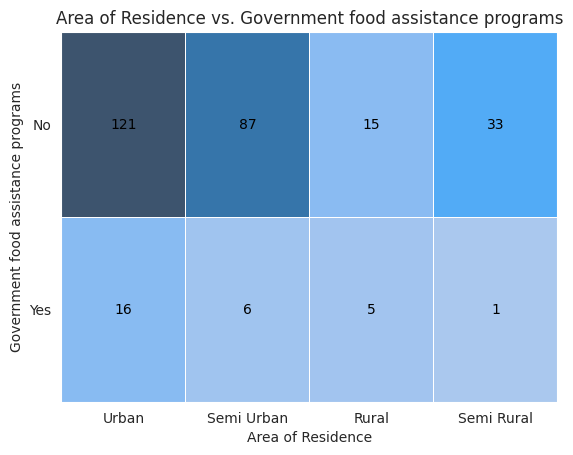

In [21]:
# plt.figure(figsize=(20, 6))
ax=sns.histplot(data, x='Area of Residence', y='Have you or your family members ever benefited from government food assistance programs such as the Public Distribution System (PDS) or the Mid-Day Meal Scheme?',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
plt.title('Area of Residence vs. Government food assistance programs')
plt.xlabel('Area of Residence')
plt.ylabel('Government food assistance programs')
plt.show()

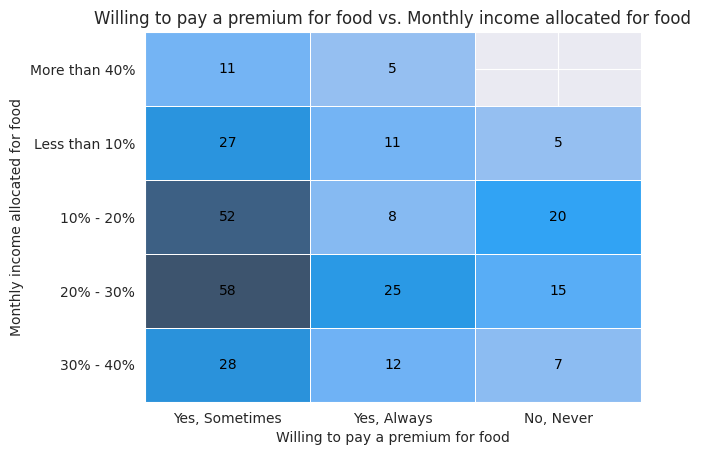

In [22]:
# plt.figure(figsize=(20, 6))
ax=sns.histplot(data,x='Are you willing to pay a premium for food products that are produced in an environmentally sustainable manner?', y='On average, how much of your monthly income do you allocate towards purchasing food?',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
plt.title('Willing to pay a premium for food vs. Monthly income allocated for food')
plt.xlabel('Willing to pay a premium for food')
plt.ylabel('Monthly income allocated for food')
plt.show()

# Health Analysis

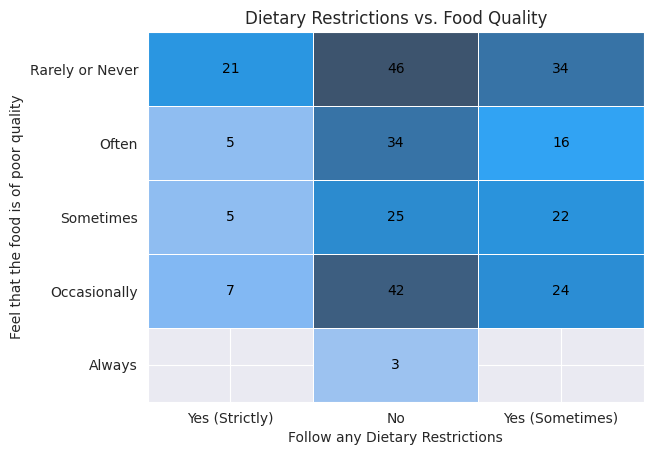

In [23]:
# plt.figure(figsize=(20, 6))
ax=sns.histplot(data,x='Do you follow any specific dietary restrictions or guidelines (e.g., vegetarian, vegan, gluten-free)?',
                y='How often do you feel that the food you have access to is of poor quality or has insufficient nutritional value?',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
plt.title('Dietary Restrictions vs. Food Quality')
plt.xlabel('Follow any Dietary Restrictions')
plt.ylabel('Feel that the food is of poor quality')
plt.show()

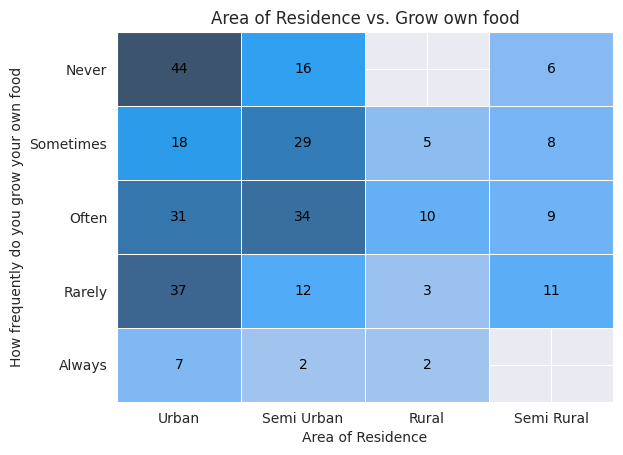

In [24]:
# plt.figure(figsize=(20, 6))
ax=sns.histplot(data,x='Area of Residence',
                y='How frequently do you grow your own food (e.g., vegetables, herbs) at home or in a community garden?',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
plt.title('Area of Residence vs. Grow own food')
plt.xlabel('Area of Residence')
plt.ylabel('How frequently do you grow your own food')
plt.show()

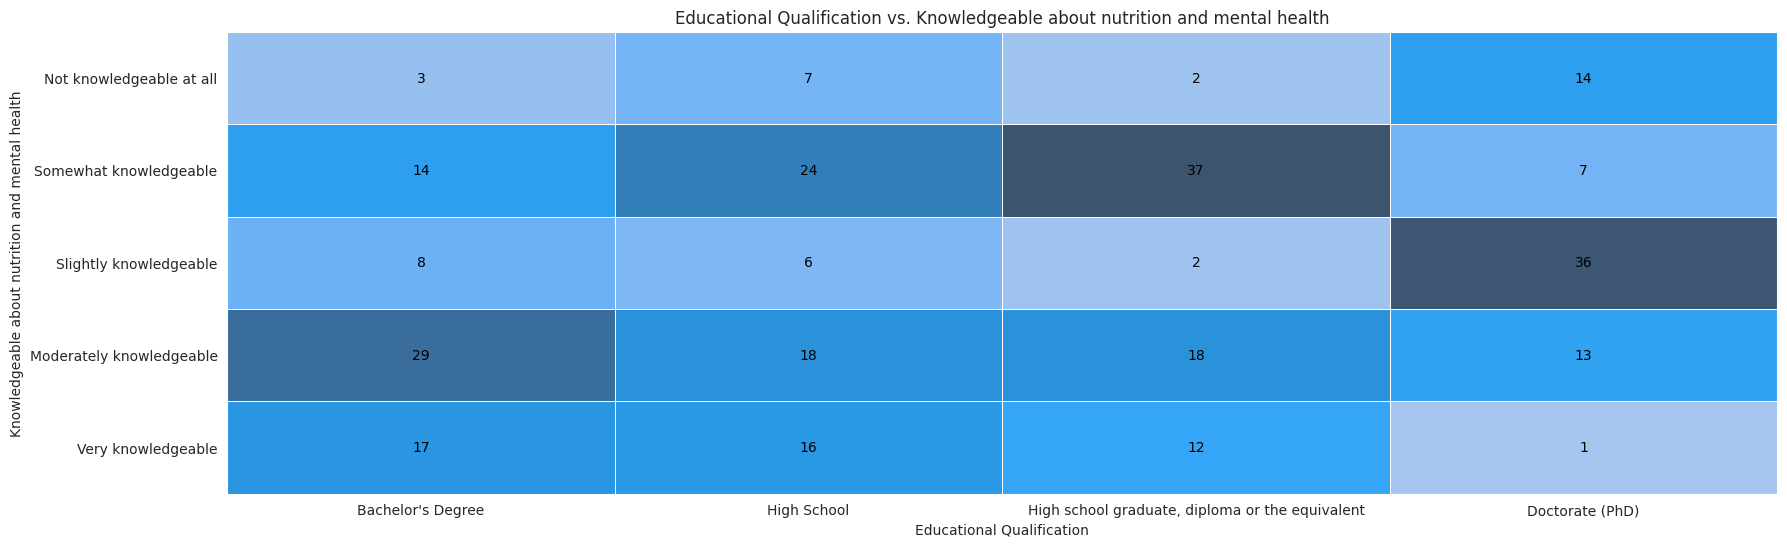

In [25]:
plt.figure(figsize=(20, 6))
ax=sns.histplot(data,x='Educational Qualification',
                y='How knowledgeable do you feel about the connection between nutrition and mental health?',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
plt.title('Educational Qualification vs. Knowledgeable about nutrition and mental health')
plt.xlabel('Educational Qualification')
plt.ylabel('Knowledgeable about nutrition and mental health')
plt.show()

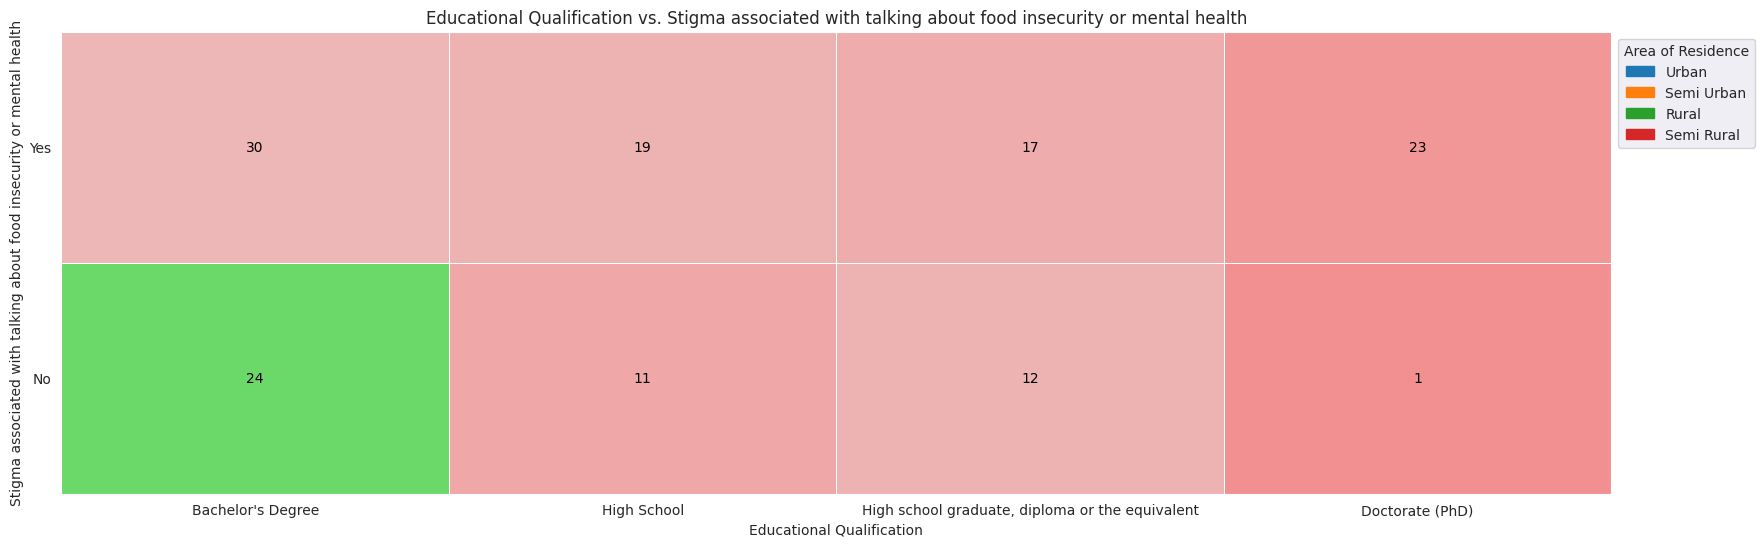

In [26]:
plt.figure(figsize=(20, 6))
ax=sns.histplot(data,x='Educational Qualification',
                hue='Area of Residence',y='Do you believe there is a stigma associated with talking about food insecurity or mental health?',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Educational Qualification vs. Stigma associated with talking about food insecurity or mental health')
plt.xlabel('Educational Qualification')
plt.ylabel('Stigma associated with talking about food insecurity or mental health')
plt.show()

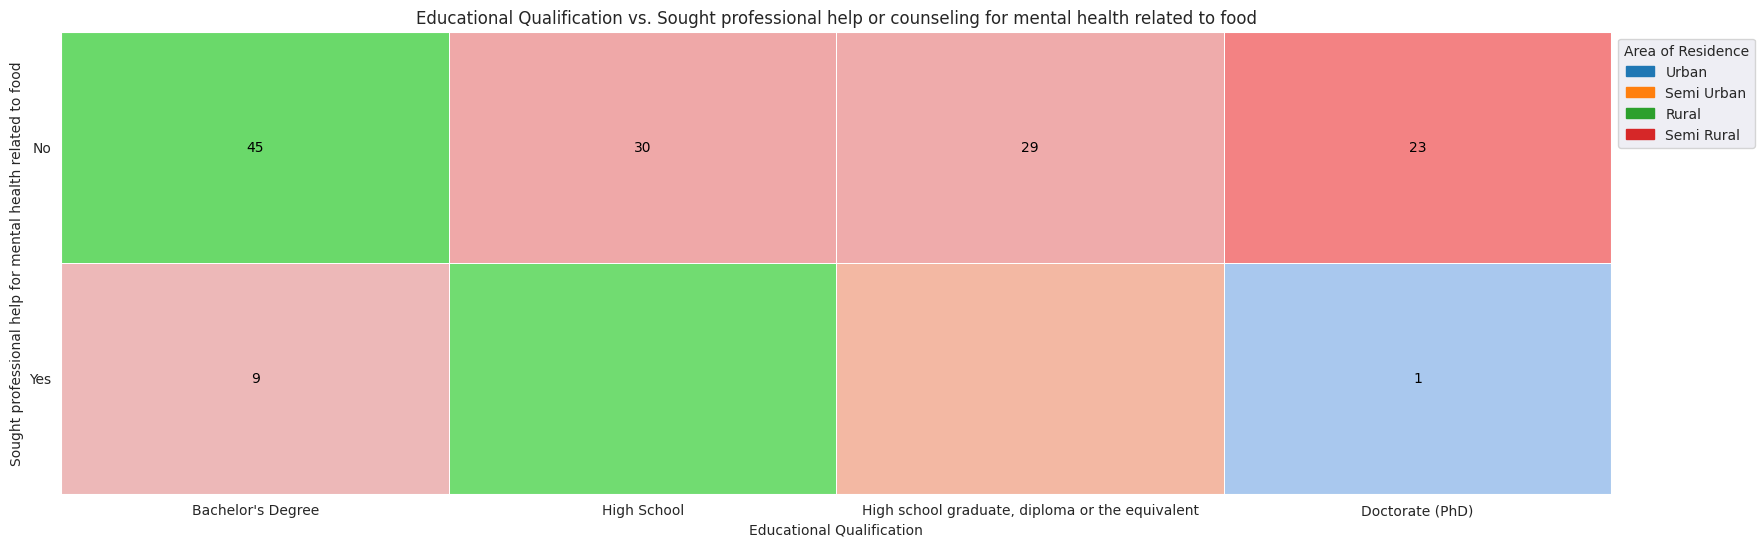

In [27]:
plt.figure(figsize=(20, 6))
ax=sns.histplot(data, x='Educational Qualification', hue='Area of Residence',
                y='Have you ever sought professional help or counseling for mental health concerns related to food, such as disordered eating or emotional eating?',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Educational Qualification vs. Sought professional help or counseling for mental health related to food')
plt.xlabel('Educational Qualification')
plt.ylabel('Sought professional help for mental health related to food')
plt.show()

# Socialogy Analysis

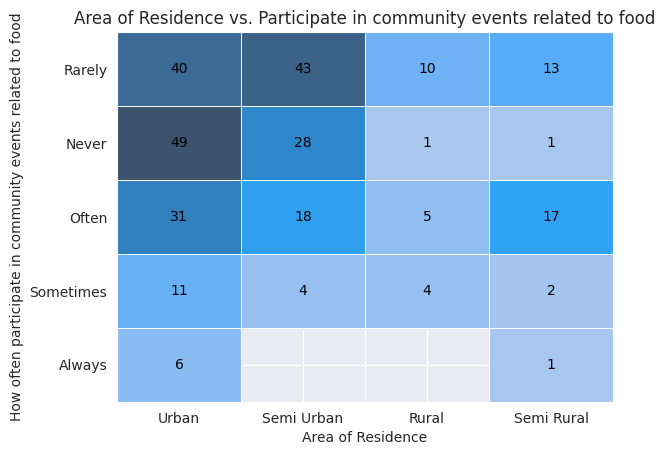

In [28]:
# plt.figure(figsize=(30,10))
ax=sns.histplot(data, x='Area of Residence',
                y='How often do you participate in community events or activities related to food (e.g., food drives, community meals)?',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
plt.title('Area of Residence vs. Participate in community events related to food')
plt.xlabel('Area of Residence')
plt.ylabel('How often participate in community events related to food')
# plt.xticks(rotation=30)
plt.show()

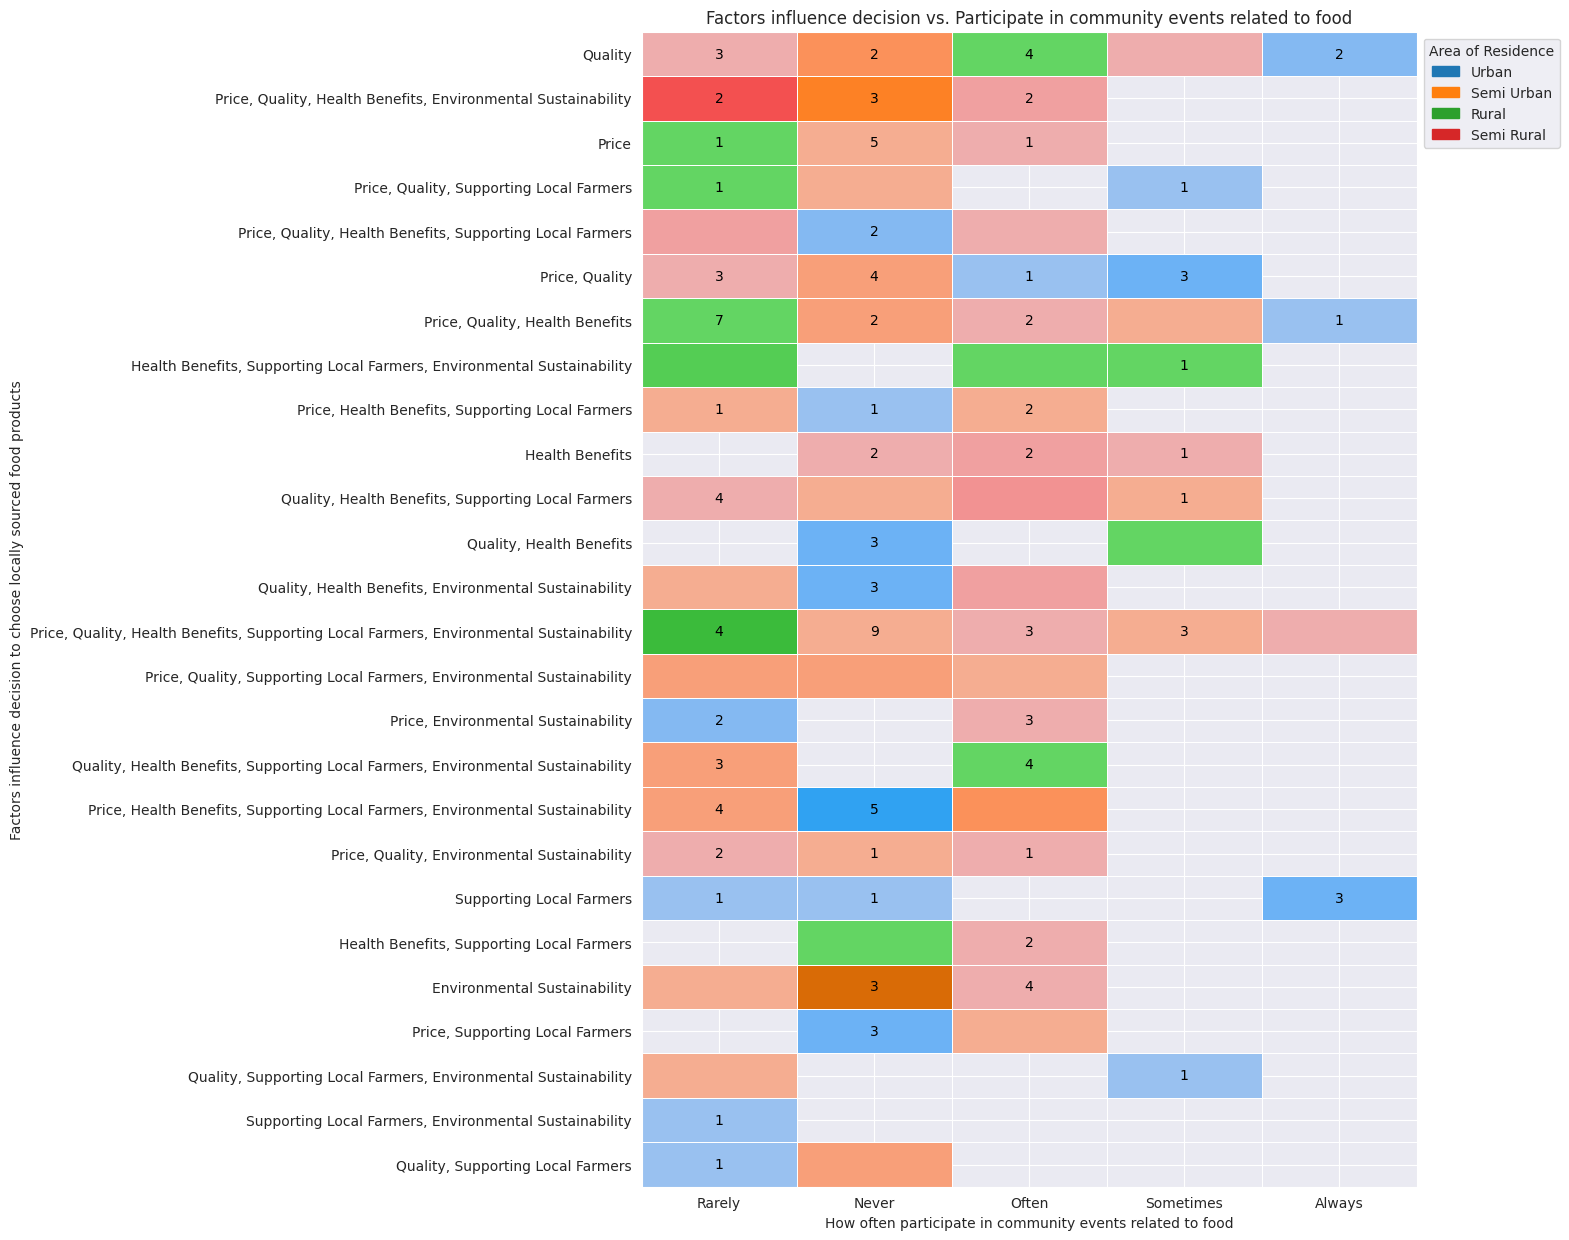

In [29]:
plt.figure(figsize=(10,15))
ax=sns.histplot(data, y='What factors influence your decision to choose locally sourced food products? (Select all that apply)',
                hue='Area of Residence',
                x='How often do you participate in community events or activities related to food (e.g., food drives, community meals)?',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Factors influence decision vs. Participate in community events related to food')
plt.xlabel('How often participate in community events related to food')
plt.ylabel('Factors influence decision to choose locally sourced food products')
# plt.xticks(rotation=30)
plt.show()

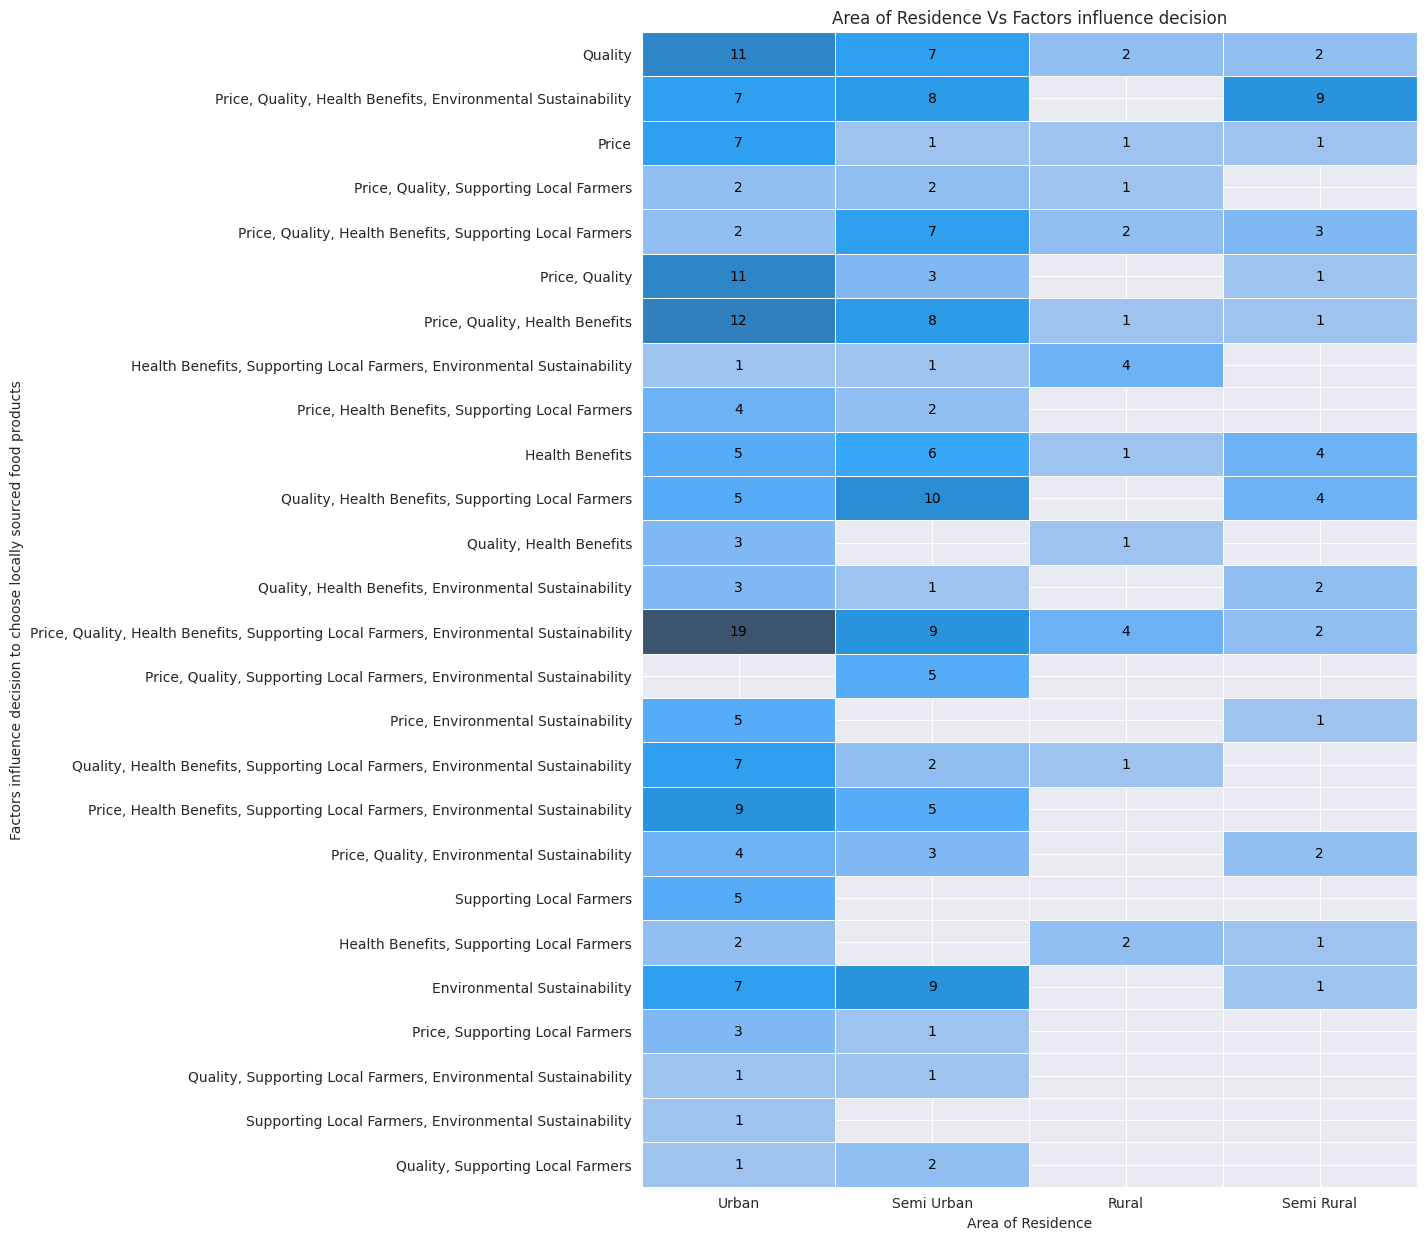

In [30]:
plt.figure(figsize=(10,15))
ax=sns.histplot(data, y='What factors influence your decision to choose locally sourced food products? (Select all that apply)',
                x='Area of Residence',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
plt.title('Area of Residence Vs Factors influence decision')
plt.ylabel('Factors influence decision to choose locally sourced food products')
plt.xlabel('Area of Residence')
# plt.xticks(rotation=30)
plt.show()

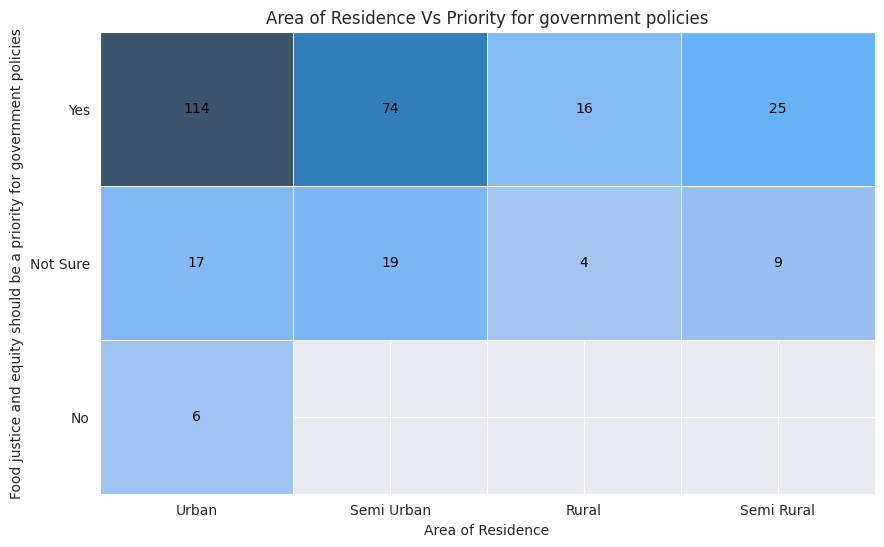

In [31]:
plt.figure(figsize=(10,6))
ax=sns.histplot(data, y='Do you believe that food justice and equity should be a priority for government policies?',
                x='Area of Residence',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
plt.title('Area of Residence Vs Priority for government policies')
plt.ylabel('Food justice and equity should be a priority for government policies',wrap=True)
plt.xlabel('Area of Residence')
# plt.xticks(rotation=30)
plt.show()

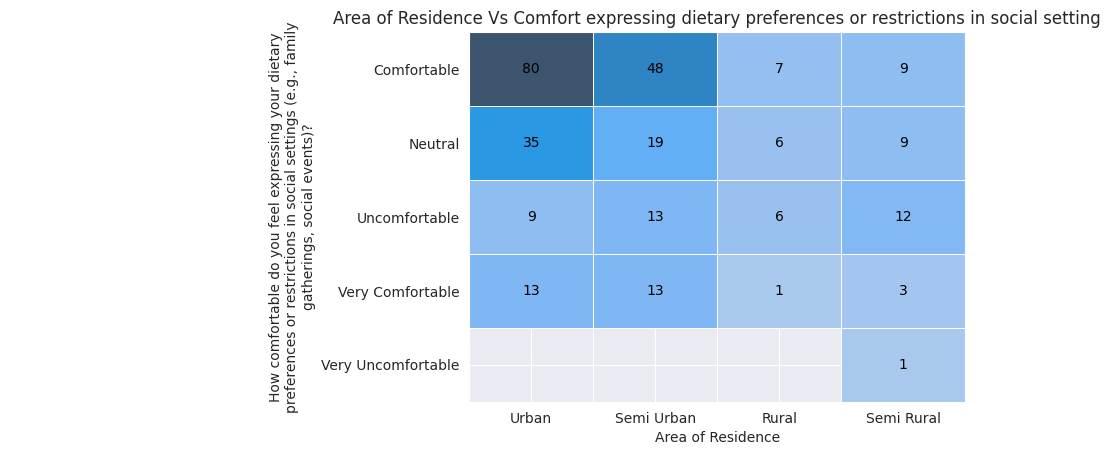

In [32]:
# plt.figure(figsize=(10,6))
ax=sns.histplot(data, y='How comfortable do you feel expressing your dietary preferences or restrictions in social settings (e.g., family gatherings, social events)?',
                x='Area of Residence',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
plt.title('Area of Residence Vs Comfort expressing dietary preferences or restrictions in social setting')
plt.ylabel('How comfortable do you feel expressing your dietary preferences or restrictions in social settings (e.g., family gatherings, social events)?',wrap=True)
plt.xlabel('Area of Residence')
# plt.xticks(rotation=30)
plt.show()

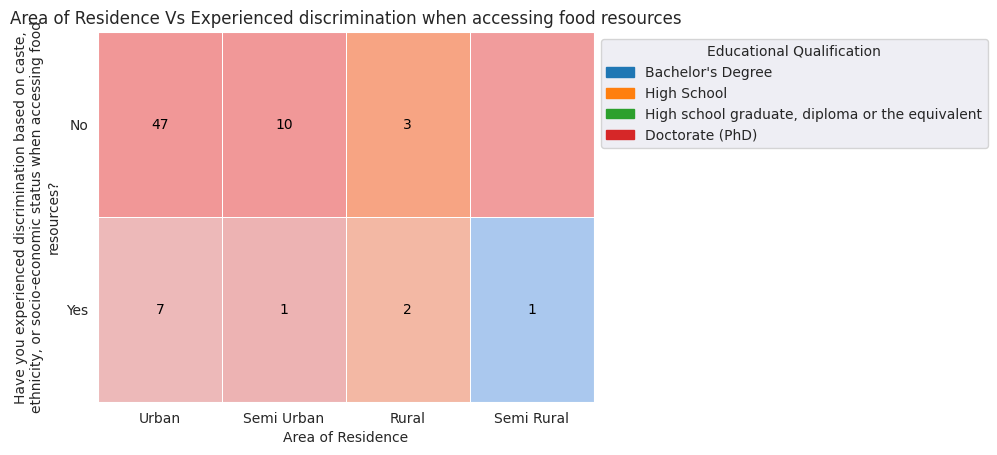

In [33]:
# plt.figure(figsize=(10,6))
ax=sns.histplot(data, y='Have you experienced discrimination based on caste, ethnicity, or socio-economic status when accessing food resources?',
                x='Area of Residence', hue='Educational Qualification',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Area of Residence Vs Experienced discrimination when accessing food resources')
plt.ylabel('Have you experienced discrimination based on caste, ethnicity, or socio-economic status when accessing food resources?',wrap=True)
plt.xlabel('Area of Residence')
# plt.xticks(rotation=30)
plt.show()

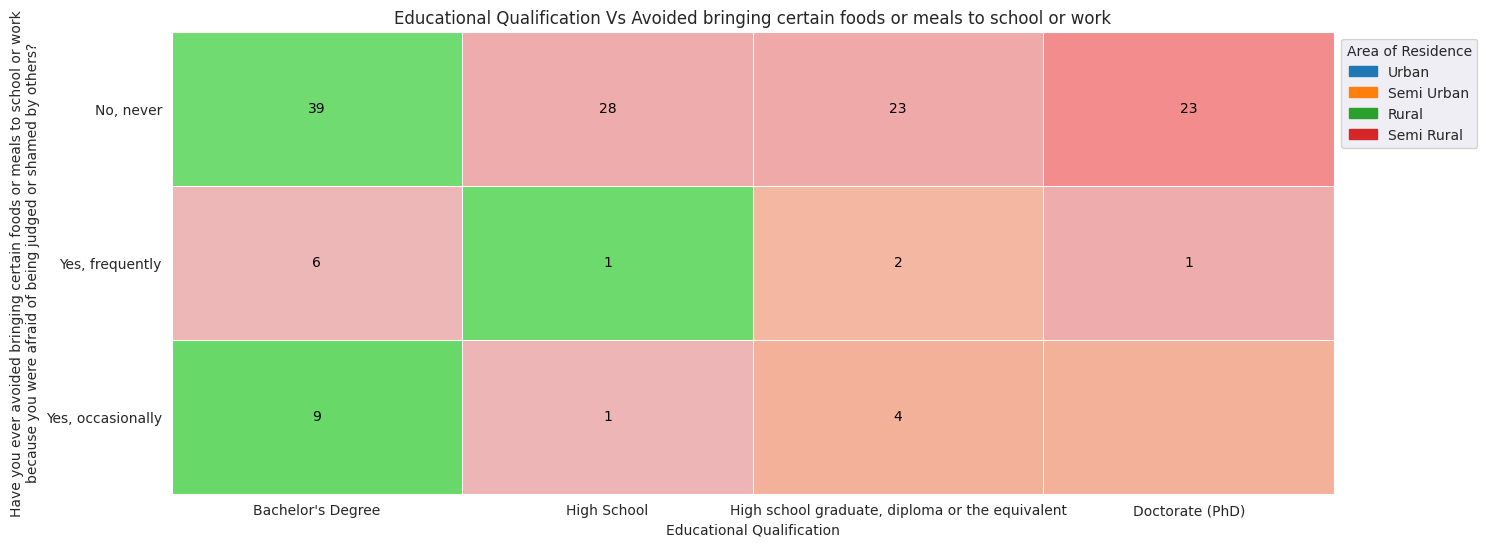

In [34]:
plt.figure(figsize=(15,6))
ax=sns.histplot(data, y='Have you ever avoided bringing certain foods or meals to school or work because you were afraid of being judged or shamed by others?',
                x='Educational Qualification',hue='Area of Residence',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Educational Qualification Vs Avoided bringing certain foods or meals to school or work')
plt.ylabel('Have you ever avoided bringing certain foods or meals to school or work because you were afraid of being judged or shamed by others?',wrap=True)
plt.xlabel('Educational Qualification',wrap=True)
# plt.xticks(rotation=30)
plt.show()

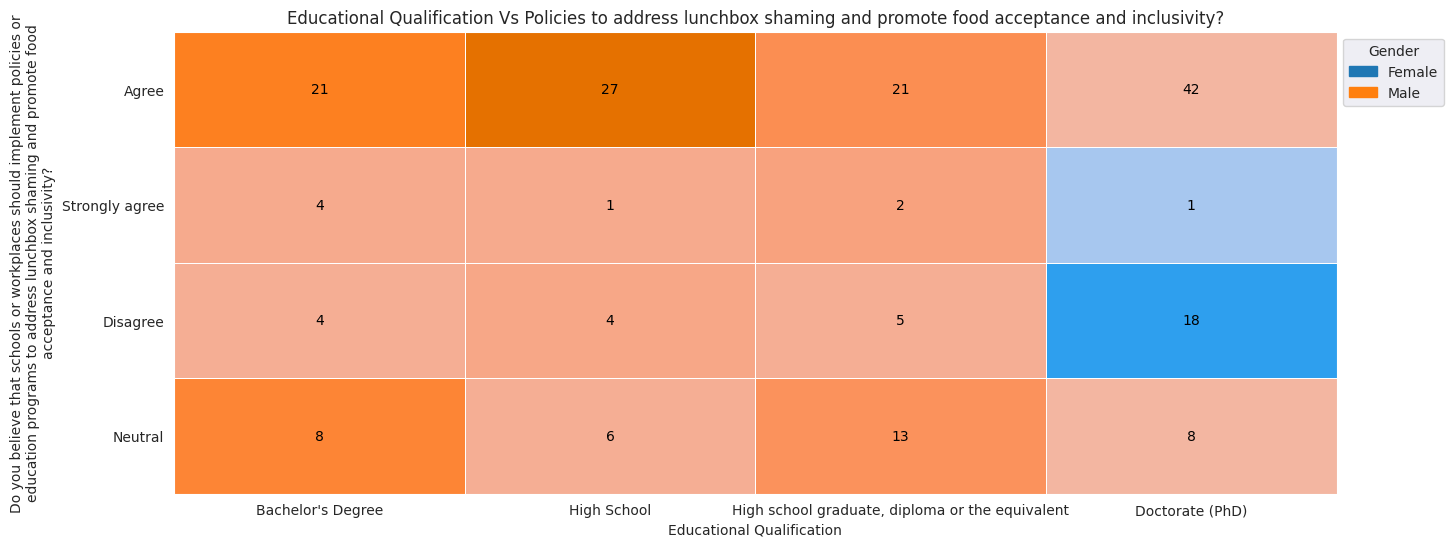

In [35]:
plt.figure(figsize=(15,6))
ax=sns.histplot(data, y='Do you believe that schools or workplaces should implement policies or education programs to address lunchbox shaming and promote food acceptance and inclusivity?',
                x='Educational Qualification',hue='Gender',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Educational Qualification Vs Policies to address lunchbox shaming and promote food acceptance and inclusivity?')
plt.ylabel('Do you believe that schools or workplaces should implement policies or education programs to address lunchbox shaming and promote food acceptance and inclusivity?',wrap=True)
plt.xlabel('Educational Qualification',wrap=True)
# plt.xticks(rotation=30)
plt.show()

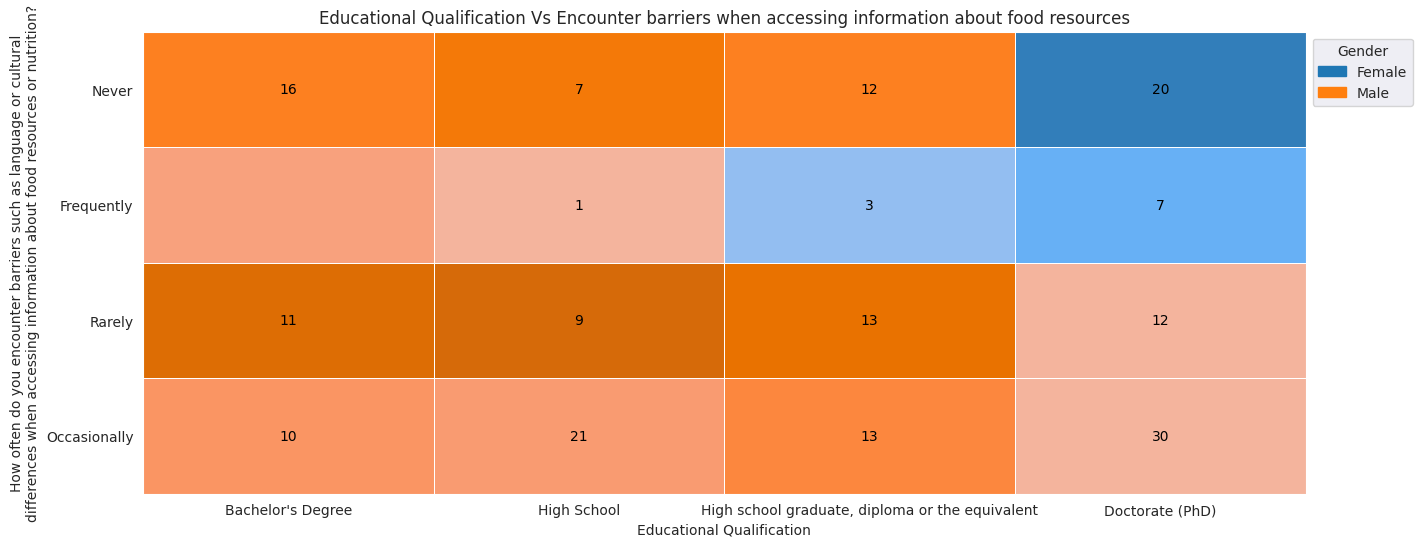

In [36]:
plt.figure(figsize=(15,6))
ax=sns.histplot(data, y='How often do you encounter barriers such as language or cultural differences when accessing information about food resources or nutrition?',
                x='Educational Qualification',hue='Gender',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Educational Qualification Vs Encounter barriers when accessing information about food resources')
plt.ylabel('How often do you encounter barriers such as language or cultural differences when accessing information about food resources or nutrition?',wrap=True)
plt.xlabel('Educational Qualification',wrap=True)
# plt.xticks(rotation=30)
plt.show()

# Technology Analysis

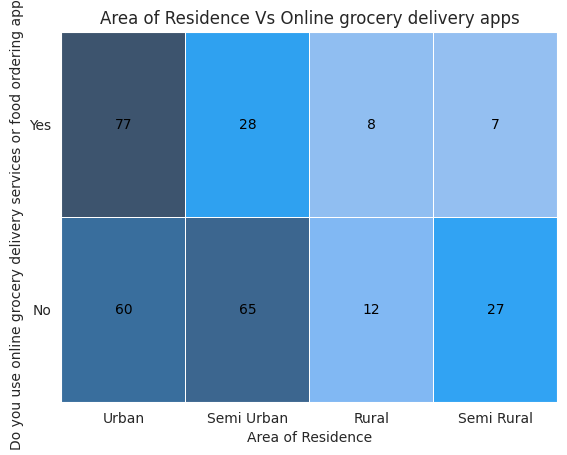

In [37]:
# plt.figure(figsize=(15,6))
ax=sns.histplot(data, y='Do you use online grocery delivery services or food ordering apps?',
                x='Area of Residence',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Area of Residence Vs Online grocery delivery apps')
plt.xlabel('Area of Residence',wrap=False)
plt.ylabel('Do you use online grocery delivery services or food ordering apps?',wrap=False)
# plt.xticks(rotation=30)
plt.show()

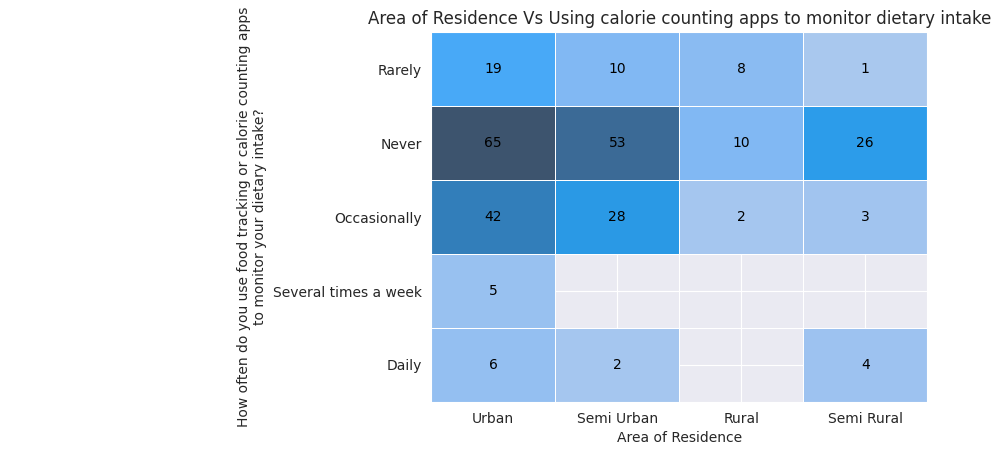

In [38]:
# plt.figure(figsize=(15,6))
ax=sns.histplot(data, y='How often do you use food tracking or calorie counting apps to monitor your dietary intake?',
                x='Area of Residence',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Area of Residence Vs Using calorie counting apps to monitor dietary intake')
plt.xlabel('Area of Residence',wrap=False)
plt.ylabel('How often do you use food tracking or calorie counting apps to monitor your dietary intake?',wrap=True)
# plt.xticks(rotation=30)
plt.show()

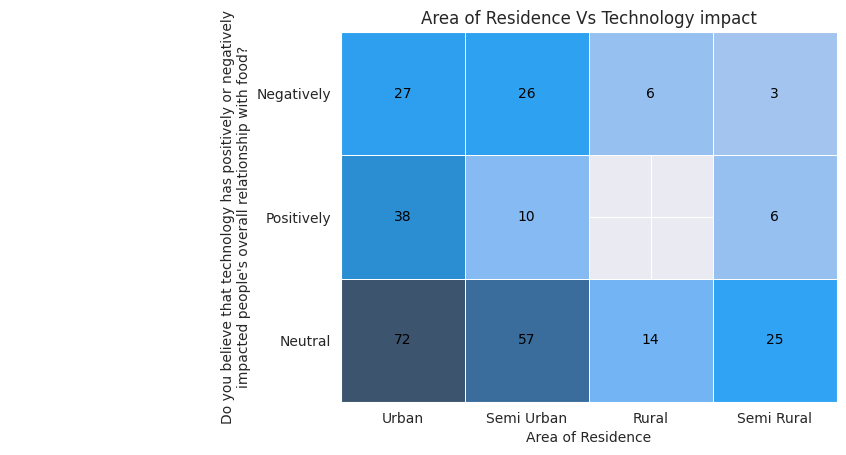

In [39]:
# plt.figure(figsize=(15,6))
ax=sns.histplot(data, y="Do you believe that technology has positively or negatively impacted people's overall relationship with food?",
                x='Area of Residence',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Area of Residence Vs Technology impact')
plt.xlabel('Area of Residence',wrap=False)
plt.ylabel("Do you believe that technology has positively or negatively impacted people's overall relationship with food?",wrap=True)
# plt.xticks(rotation=30)
plt.show()

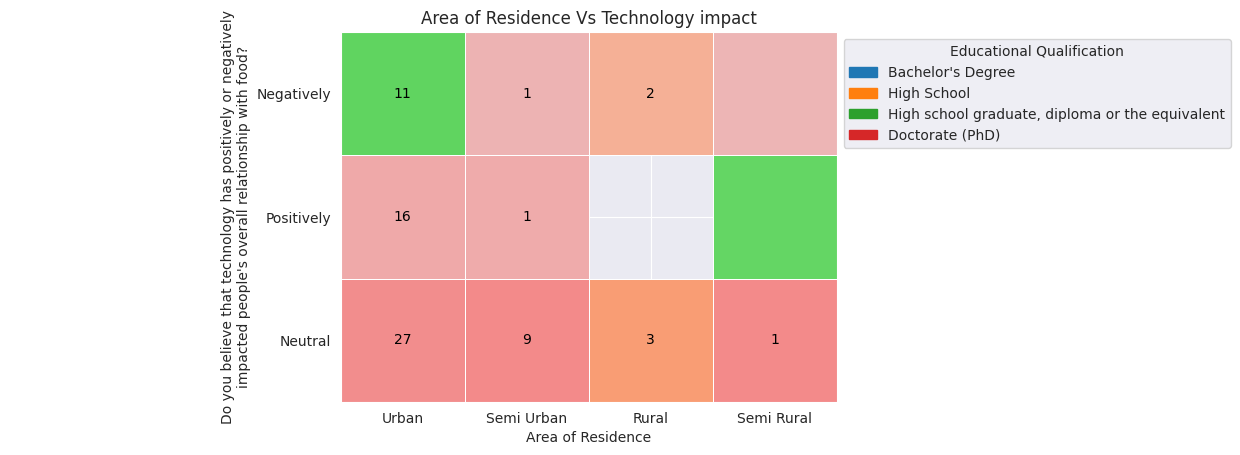

In [40]:
# plt.figure(figsize=(15,6))
ax=sns.histplot(data, y="Do you believe that technology has positively or negatively impacted people's overall relationship with food?",
                x='Area of Residence',hue='Educational Qualification',
                edgecolor='white', linewidth=0.5)
coords = ax.collections[0].get_coordinates()
half_width = (coords[0, 1, 0] - coords[0, 0, 0]) / 2
half_height = (coords[1, 0, 1] - coords[0, 0, 1]) / 2
for v, (xv, yv) in zip(ax.collections[0].get_array().ravel(), coords[:-1, :-1, :].reshape(-1, 2)):
    if not np.ma.is_masked(v):
        ax.text(xv + half_width, yv + half_height, f'{v:.0f}', ha='center', va='center', color='Black')
ax.margins(x=0, y=0)  # remove unneeded whitespace
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Area of Residence Vs Technology impact')
plt.xlabel('Area of Residence',wrap=False)
plt.ylabel("Do you believe that technology has positively or negatively impacted people's overall relationship with food?",wrap=True)
# plt.xticks(rotation=30)
plt.show()

# Cross-tabulation (Contingency Tables)

## Health

###1

If the joint distribution is independent, it can be written as the outer product of the row and column marginal distributions:

  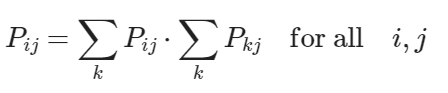

We can obtain the best-fitting independent distribution for our observed data, and then view residuals which identify particular cells that most strongly violate independence:

In [41]:
df = data[["Area of Residence", "When making food choices, which factor influences you the most?"]]
table = sm.stats.Table.from_data(df)
table.fittedvalues

"When making food choices, which factor influences you the most?",Convenience,Cost,Environmental Impact,Nutritional Value,Taste and Flavour
Area of Residence,,,,,
Rural,0.696335,0.549738,0.842932,13.267016,5.643979
Semi Rural,1.160558,0.916230,1.404887,22.111693,9.406632
Semi Urban,3.100349,2.447644,3.753054,59.069808,25.129145
Urban,4.542757,3.586387,5.499127,86.551483,36.820244


If the rows and columns of a table are unordered (i.e. are nominal factors), then the most common approach for formally assessing independence is using Pearson’s $χ^2$
 statistic. It’s often useful to look at the cell-wise contributions to the $\chi^2$
 statistic to see where the evidence for dependence is coming from.

In [42]:
rslt = table.test_nominal_association()
print(rslt.pvalue)
table.chi2_contribs

0.0011548593606156565


"When making food choices, which factor influences you the most?",Convenience,Cost,Environmental Impact,Nutritional Value,Taste and Flavour
Area of Residence,,,,,
Rural,0.132425,0.004500,0.139516,1.372383,3.361975
Semi Rural,0.375972,0.189088,0.252092,1.080675,2.064331
Semi Urban,0.261058,1.549783,0.016249,3.773681,7.944271
Urban,0.064847,1.624344,0.045303,2.794275,5.460732


###2

In [43]:
df = data[["Area of Residence", "Do you believe there is a stigma associated with talking about food insecurity or mental health?"]]
table = sm.stats.Table.from_data(df)
table.fittedvalues

Do you believe there is a stigma associated with talking about food insecurity or mental health?,No,Yes
Area of Residence,,
Rural,9.577465,10.422535
Semi Rural,16.281690,17.718310
Semi Urban,44.535211,48.464789
Urban,65.605634,71.394366


In [44]:
rslt = table.test_nominal_association()
print(rslt.pvalue)
table.chi2_contribs

0.00016781312768765488


Do you believe there is a stigma associated with talking about food insecurity or mental health?,No,Yes
Area of Residence,,
Rural,3.070112,2.821184
Semi Rural,0.181344,0.166641
Semi Urban,2.458994,2.259616
Urban,4.724569,4.341496


## Socialogy

###1

In [45]:
df = data[["Area of Residence", "To what extent do cultural traditions influence your food choices?"]]
table = sm.stats.Table.from_data(df)
table.fittedvalues

To what extent do cultural traditions influence your food choices?,Slightly,Somewhat,To a great extent,Very Much
Area of Residence,,,,
Rural,0.492958,8.098592,9.295775,2.112676
Semi Rural,0.838028,13.767606,15.802817,3.591549
Semi Urban,2.292254,37.658451,43.225352,9.823944
Urban,3.376761,55.475352,63.676056,14.471831


In [46]:
rslt = table.test_nominal_association()
print(rslt.pvalue)
table.chi2_contribs

0.7100574267952384


To what extent do cultural traditions influence your food choices?,Slightly,Somewhat,To a great extent,Very Much
Area of Residence,,,,
Rural,0.521529,0.149026,0.312441,0.586009
Semi Rural,0.031305,0.361979,0.497113,0.046451
Semi Urban,0.037261,0.355412,1.061781,0.811757
Urban,0.042037,0.114895,0.505961,0.860152


For tables with ordered row and column factors, we can us the linear by linear association test to obtain more power against alternative hypotheses that respect the ordering. The test statistic for the linear by linear association test is
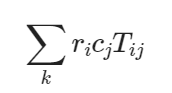

where $r_i$
 and $c_j$
 are row and column scores. Often these scores are set to the sequences 0, 1, …. This gives the ‘Cochran-Armitage trend test’.

In [47]:
rslt = table.test_ordinal_association()
print(rslt.pvalue)
table.local_oddsratios

0.579913113799386


To what extent do cultural traditions influence your food choices?,Slightly,Somewhat,To a great extent,Very Much
Area of Residence,,,,
Rural,2.285714,0.517045,3.384615,NaN
Semi Rural,1.062500,1.809955,0.455000,NaN
Semi Urban,1.137255,0.680000,2.216749,NaN
Urban,NaN,NaN,NaN,NaN


###2

In [48]:
df = data[["Area of Residence", "Have you ever avoided bringing certain foods or meals to school or work because you were afraid of being judged or shamed by others?"]]
table = sm.stats.Table.from_data(df)
table.fittedvalues

Have you ever avoided bringing certain foods or meals to school or work because you were afraid of being judged or shamed by others?,"No, never","Yes, frequently","Yes, occasionally"
Area of Residence,,,
Rural,16.338028,1.690141,1.971831
Semi Rural,27.774648,2.873239,3.352113
Semi Urban,75.971831,7.859155,9.169014
Urban,111.915493,11.577465,13.507042


In [49]:
rslt = table.test_nominal_association()
print(rslt.pvalue)
table.chi2_contribs

0.1477937625438116


Have you ever avoided bringing certain foods or meals to school or work because you were afraid of being judged or shamed by others?,"No, never","Yes, frequently","Yes, occasionally"
Area of Residence,,,
Rural,0.681994,1.015141,2.086117
Semi Rural,0.113390,3.402651,0.545390
Semi Urban,0.213581,1.040159,0.149045
Urban,0.010509,0.214934,0.017991


In [50]:
rslt = table.test_ordinal_association()
print(rslt.pvalue)
table.local_oddsratios

0.22821769434573147


Have you ever avoided bringing certain foods or meals to school or work because you were afraid of being judged or shamed by others?,"No, never","Yes, frequently","Yes, occasionally"
Area of Residence,,,
Rural,1.000000,0.250,NaN
Semi Rural,0.270833,4.800,NaN
Semi Urban,1.415929,0.875,NaN
Urban,NaN,NaN,NaN


###3

In [51]:
df = data[["Area of Residence", "Have you experienced discrimination based on caste, ethnicity, or socio-economic status when accessing food resources?"]]
table = sm.stats.Table.from_data(df)
table.fittedvalues

"Have you experienced discrimination based on caste, ethnicity, or socio-economic status when accessing food resources?",No,Yes
Area of Residence,,
Rural,17.957746,2.042254
Semi Rural,30.528169,3.471831
Semi Urban,83.503521,9.496479
Urban,123.010563,13.989437


In [52]:
rslt = table.test_nominal_association()
print(rslt.pvalue)
table.chi2_contribs

0.4625483493680932


"Have you experienced discrimination based on caste, ethnicity, or socio-economic status when accessing food resources?",No,Yes
Area of Residence,,
Rural,0.051080,0.449150
Semi Rural,0.200141,1.759863
Semi Urban,0.003036,0.026698
Urban,0.008302,0.073001


## Economics

###1

In [53]:
df = data[["What is your Annual Income?", "How frequently do you skip meals due to financial constraints or lack of access to food?"]]
table = sm.stats.Table.from_data(df)
table.fittedvalues

How frequently do you skip meals due to financial constraints or lack of access to food?,Never,Often,Rarely,Sometimes
What is your Annual Income?,,,,
INR 1-5 Lakhs,3.285467,0.506055,0.467128,0.241349
INR 5-15 Lakhs,10.221453,1.574394,1.453287,0.750865
Less than INR 1 Lakh,21.903114,3.373702,3.114187,1.608997
More than INR 15 Lakhs,19.712803,3.036332,2.802768,1.448097
None as of now (Student),154.051903,23.728374,21.903114,11.316609
Prefer not to Say,1.825260,0.281142,0.259516,0.134083


In [54]:
rslt = table.test_nominal_association()
print(rslt.pvalue)
table.chi2_contribs

0.3245651939130898


How frequently do you skip meals due to financial constraints or lack of access to food?,Never,Often,Rarely,Sometimes
What is your Annual Income?,,,,
INR 1-5 Lakhs,0.502950,0.482124,0.607869,0.277192
INR 5-15 Lakhs,0.309470,0.733186,0.625311,0.082662
Less than INR 1 Lakh,1.697111,2.447805,2.194465,0.230502
More than INR 15 Lakhs,0.265374,0.305848,1.891966,0.620737
None as of now (Student),0.420853,0.217473,1.186053,0.041269
Prefer not to Say,0.373127,0.170373,0.222849,0.998599


In [55]:
rslt = table.test_ordinal_association()
print(rslt.pvalue)
table.local_oddsratios

0.08214629365807585


How frequently do you skip meals due to financial constraints or lack of access to food?,Never,Often,Rarely,Sometimes
What is your Annual Income?,,,,
INR 1-5 Lakhs,0.083333,1.000000,4.000000,NaN
INR 5-15 Lakhs,0.428571,1.000000,1.000000,NaN
Less than INR 1 Lakh,10.181818,0.125000,0.500000,NaN
More than INR 15 Lakhs,0.979452,8.307692,0.444444,NaN
None as of now (Student),2.807692,0.962963,2.250000,NaN
Prefer not to Say,NaN,NaN,NaN,NaN


###2

In [56]:
df = data[["What is your Annual Income?", "On average, how much of your monthly income do you allocate towards purchasing food?"]]
table = sm.stats.Table.from_data(df)
table.fittedvalues

"On average, how much of your monthly income do you allocate towards purchasing food?",10% - 20%,20% - 30%,30% - 40%,Less than 10%,More than 40%
What is your Annual Income?,,,,,
INR 1-5 Lakhs,1.398964,1.692573,0.829016,0.768566,0.310881
INR 5-15 Lakhs,4.056995,4.908463,2.404145,2.228843,0.901554
Less than INR 1 Lakh,8.253886,9.986183,4.891192,4.534542,1.834197
More than INR 15 Lakhs,7.414508,8.970639,4.393782,4.073402,1.647668
None as of now (Student),59.036269,71.426598,34.984456,32.433506,13.119171
Prefer not to Say,0.839378,1.015544,0.497409,0.461140,0.186528


In [57]:
rslt = table.test_ordinal_association()
print(rslt.pvalue)
table.local_oddsratios

0.0003428352997384551


"On average, how much of your monthly income do you allocate towards purchasing food?",10% - 20%,20% - 30%,30% - 40%,Less than 10%,More than 40%
What is your Annual Income?,,,,,
INR 1-5 Lakhs,0.222222,0.062500,4.000000,0.500000,NaN
INR 5-15 Lakhs,1.650000,1.454545,0.500000,0.500000,NaN
Less than INR 1 Lakh,1.115702,1.833333,2.000000,0.333333,NaN
More than INR 15 Lakhs,1.955556,1.666667,0.975000,2.307692,NaN
None as of now (Student),1.250000,0.900000,1.025641,2.600000,NaN
Prefer not to Say,NaN,NaN,NaN,NaN,NaN


## Technology

###1

In [58]:
df = data[["Area of Residence", "How often do you engage with food-related content on streaming platforms (e.g., cooking shows, food documentaries)?"]]
table = sm.stats.Table.from_data(df)
table.fittedvalues

"How often do you engage with food-related content on streaming platforms (e.g., cooking shows, food documentaries)?",Daily,Never,Occasionally,Rarely,Several times a week
Area of Residence,,,,,
Rural,2.816901,2.253521,8.380282,4.859155,1.690141
Semi Rural,4.788732,3.830986,14.246479,8.260563,2.873239
Semi Urban,13.098592,10.478873,38.968310,22.595070,7.859155
Urban,19.295775,15.436620,57.404930,33.285211,11.577465


In [59]:
rslt = table.test_nominal_association()
print(rslt.pvalue)
table.chi2_contribs

8.088874015044212e-11


"How often do you engage with food-related content on streaming platforms (e.g., cooking shows, food documentaries)?",Daily,Never,Occasionally,Rarely,Several times a week
Area of Residence,,,,,
Rural,1.171901,0.247271,0.017256,0.151909,3.156808
Semi Rural,36.447556,0.007457,7.369563,1.286991,0.005592
Semi Urban,5.007194,2.908981,0.914095,4.791424,0.439800
Urban,0.562928,2.683882,4.797434,1.186830,0.028803


###2

In [60]:
df = data[["Educational Qualification", "How often do you use technology (e.g., smart kitchen appliances, cooking apps) to assist you in meal preparation or cooking?"]]
table = sm.stats.Table.from_data(df)
table.fittedvalues

"How often do you use technology (e.g., smart kitchen appliances, cooking apps) to assist you in meal preparation or cooking?",Daily,Neve,Occasionally,Rarely,Several times a week
Educational Qualification,,,,,
Bachelor's Degree,3.369069,9.233743,38.432337,15.472759,4.492091
Doctorate (PhD),3.369069,9.233743,38.432337,15.472759,4.492091
High School,3.392794,9.298770,38.702988,15.581722,4.523726
"High school graduate, diploma or the equivalent",3.369069,9.233743,38.432337,15.472759,4.492091


In [61]:
rslt = table.test_ordinal_association()
print(rslt.pvalue)
table.local_oddsratios

0.5465729967944162


"How often do you use technology (e.g., smart kitchen appliances, cooking apps) to assist you in meal preparation or cooking?",Daily,Neve,Occasionally,Rarely,Several times a week
Educational Qualification,,,,,
Bachelor's Degree,0.571429,0.648649,0.283991,0.301587,NaN
Doctorate (PhD),33.250000,0.307018,2.742857,1.500000,NaN
High School,0.039474,3.076190,1.617647,1.060606,NaN
"High school graduate, diploma or the equivalent",NaN,NaN,NaN,NaN,NaN


# Sentiment or Likert Scale Analysis

In [62]:
mydict = {}
for column in data.columns[1:]:
    count = data[column].value_counts()
    mydict[column] = columndict = {}
    for i in range(len(count)):
        columndict[count.index[i]] = count[i]
mydict
pd.DataFrame(mydict).to_csv('abc.csv')

# Cluster Analysis

In [63]:
# Preprocessing the data for cluster analysis

# 1. Encoding categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# 2. Normalizing the data (since we have mixed categorical and numerical data)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Inspect the preprocessed data
pd.DataFrame(data_scaled, columns=data_encoded.columns).head()


,Age,Area of Residence_Semi Rural,Area of Residence_Semi Urban,Area of Residence_Urban,What is your Annual Income?_INR 5-15 Lakhs,What is your Annual Income?_Less than INR 1 Lakh,What is your Annual Income?_More than INR 15 Lakhs,What is your Annual Income?_None as of now (Student),What is your Annual Income?_Prefer not to Say,"On average, how much of your monthly income do you allocate towards purchasing food?_20% - 30%",...,Do you believe there is a stigma associated with talking about food insecurity or mental health?_Yes,"Have you ever sought professional help or counseling for mental health concerns related to food, such as disordered eating or emotional eating?_Yes",Do you think mental health support services should include resources or programs specifically addressing the relationship between food and mental well-being? _Disagree,Do you think mental health support services should include resources or programs specifically addressing the relationship between food and mental well-being? _Neutral,Do you think mental health support services should include resources or programs specifically addressing the relationship between food and mental well-being? _Strongly agree,Do you think mental health support services should include resources or programs specifically addressing the relationship between food and mental well-being? _Strongly disagree,Gender_Male,Educational Qualification_Doctorate (PhD),Educational Qualification_High School,"Educational Qualification_High school graduate, diploma or the equivalent"
0,0.687968,-0.368782,-0.697790,1.035854,-0.219022,-0.337232,-0.317451,-1.700121,-0.059444,-0.725866,...,0.958603,-0.244339,-0.330719,-0.965387,-0.296855,-0.059444,-0.731529,-0.57735,-0.577350,-0.577350
1,0.687968,-0.368782,1.433096,-0.965387,-0.219022,-0.337232,-0.317451,0.588193,-0.059444,-0.725866,...,-1.043185,-0.244339,-0.330719,1.035854,-0.296855,-0.059444,1.366999,-0.57735,1.732051,-0.577350
2,-0.121071,-0.368782,-0.697790,1.035854,-0.219022,-0.337232,-0.317451,0.588193,-0.059444,-0.725866,...,0.958603,-0.244339,-0.330719,-0.965387,3.368653,-0.059444,1.366999,-0.57735,-0.577350,1.732051
3,0.283448,-0.368782,-0.697790,1.035854,-0.219022,-0.337232,-0.317451,0.588193,-0.059444,1.377664,...,-1.043185,-0.244339,-0.330719,1.035854,-0.296855,-0.059444,1.366999,-0.57735,-0.577350,-0.577350
4,0.687968,-0.368782,-0.697790,1.035854,-0.219022,-0.337232,-0.317451,0.588193,-0.059444,-0.725866,...,0.958603,-0.244339,-0.330719,-0.965387,-0.296855,-0.059444,1.366999,-0.57735,-0.577350,1.732051


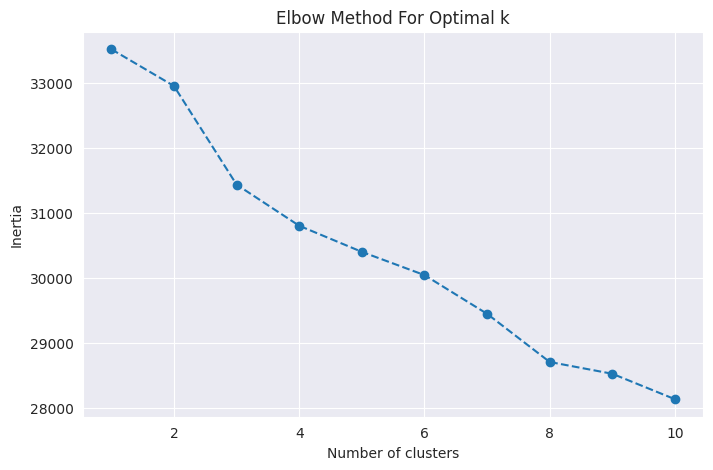

In [64]:
# Perform K-means clustering and use the Elbow Method to determine the optimal number of clusters

# Range of possible cluster numbers
cluster_range = range(1, 11)
inertia = []

# Perform KMeans for different cluster numbers and store the inertia (within-cluster sum of squares)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [65]:
# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original dataframe
data['Cluster'] = clusters

# Display a few rows of the data with cluster labels
data[['Age', 'Gender', 'Area of Residence', 'Educational Qualification', 'Cluster']].head()

,Age,Gender,Area of Residence,Educational Qualification,Cluster
0,21,Female,Urban,Bachelor's Degree,0
1,21,Male,Semi Urban,High School,0
2,19,Male,Urban,"High school graduate, diploma or the equivalent",0
3,20,Male,Urban,Bachelor's Degree,0
4,21,Male,Urban,"High school graduate, diploma or the equivalent",2


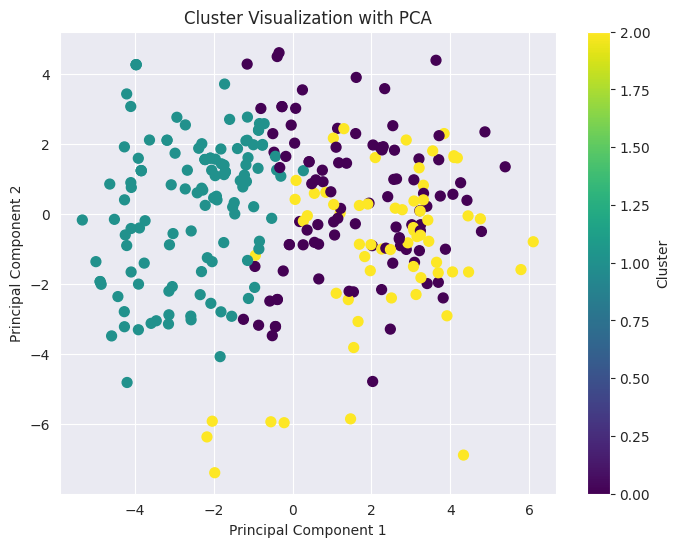

In [66]:
# Perform PCA to reduce the data to 2 components for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the PCA components and the cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', s=50)
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [67]:
# Create a copy of the dataset to avoid overwriting the original data
data_numerical = data.copy()

# Identify all categorical columns
categorical_columns = data_numerical.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    data_numerical[column] = le.fit_transform(data_numerical[column])

# Check the first few rows of the transformed data
data_numerical.head()


,Age,Area of Residence,What is your Annual Income?,"On average, how much of your monthly income do you allocate towards purchasing food?",What factors influence your decision to choose locally sourced food products? (Select all that apply),"Do you follow any specific dietary restrictions or guidelines (e.g., vegetarian, vegan, gluten-free)?",How often do you feel that the food you have access to is of poor quality or has insufficient nutritional value?,How frequently do you skip meals due to financial constraints or lack of access to food?,Have you or your family members ever benefited from government food assistance programs such as the Public Distribution System (PDS) or the Mid-Day Meal Scheme?,"How often do you participate in community events or activities related to food (e.g., food drives, community meals)?",...,Do you believe that technology has positively or negatively impacted people's overall relationship with food?,"How often do you engage with food-related content on streaming platforms (e.g., cooking shows, food documentaries)?","How often do you use technology (e.g., smart kitchen appliances, cooking apps) to assist you in meal preparation or cooking?",How knowledgeable do you feel about the connection between nutrition and mental health?,Do you believe there is a stigma associated with talking about food insecurity or mental health?,"Have you ever sought professional help or counseling for mental health concerns related to food, such as disordered eating or emotional eating?",Do you think mental health support services should include resources or programs specifically addressing the relationship between food and mental well-being?,Gender,Educational Qualification,Cluster
0,21,3,0,4,17,2,3,0,0,3,...,0,2,3,1,1,0,0,0,0,0
1,21,2,4,3,11,2,3,0,0,1,...,0,2,2,3,0,0,2,1,2,0
2,19,3,4,0,17,0,3,0,0,1,...,0,4,3,3,1,0,3,1,3,0
3,20,3,4,1,4,1,2,3,0,2,...,0,2,3,2,0,0,2,1,0,0
4,21,3,4,0,14,0,4,2,0,4,...,2,2,4,3,1,0,0,1,3,2


Are certain clusters dominated by a particular age group, gender, or income bracket?

In [68]:
# Calculate the distribution of age, gender, and income across clusters
demographic_summary = data_numerical.groupby('Cluster').agg({
    'Age': 'mean',
    'Gender': lambda x: x.mode()[0],  # Mode for categorical values like Gender
    'What is your Annual Income?': 'mean'
})

demographic_summary

,Age,Gender,What is your Annual Income?
Cluster,,,
0,19.030303,1,3.59596
1,19.016529,0,3.53719
2,20.250000,1,3.34375


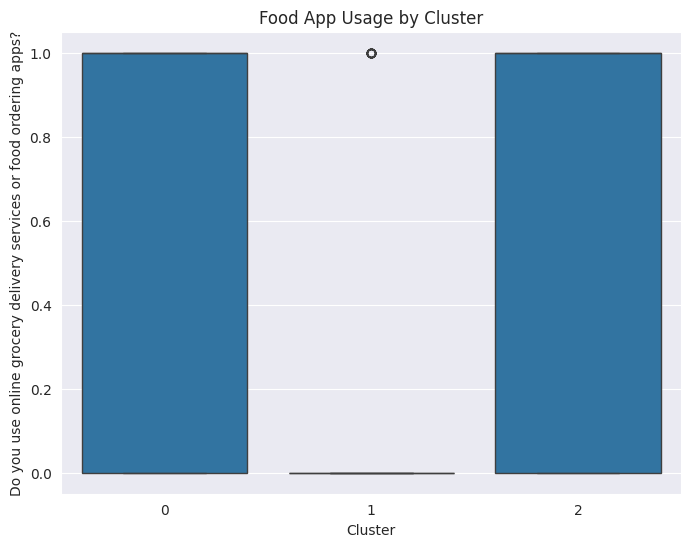

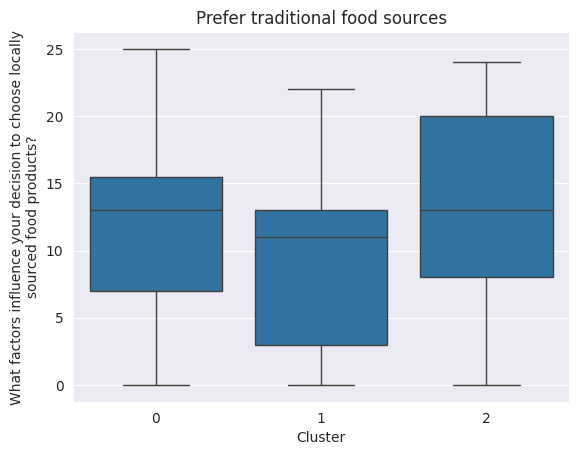

In [69]:
# Visualize the distribution of app usage across clusters
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster',
            y='Do you use online grocery delivery services or food ordering apps?', data=data_numerical)
plt.title('Food App Usage by Cluster')
plt.ylabel('Do you use online grocery delivery services or food ordering apps?',wrap=True)
plt.show()

# Visualize concern for food justice across clusters
# plt.figure(figsize=(14, 6))
sns.boxplot(x='Cluster',
            y='What factors influence your decision to choose locally sourced food products? (Select all that apply)', data=data_numerical)
plt.title('Prefer traditional food sources')
plt.ylabel('What factors influence your decision to choose locally sourced food products?',wrap=True)
plt.show()

Interpretation:

High App Usage Group: If one cluster shows significantly higher app usage, you can infer that people in this group are more tech-savvy and engaged with food-related technology.

Food Justice Concerned Group: If a particular cluster shows higher concern for food justice, this group may be more socially aware and prioritize ethical food practices.

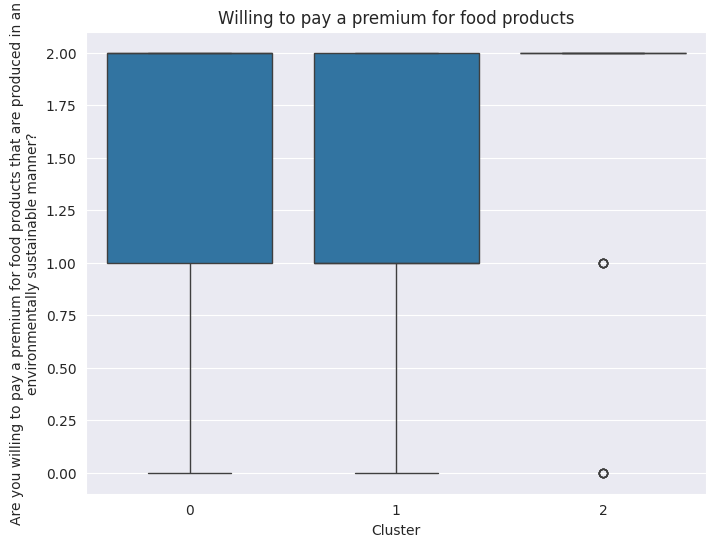

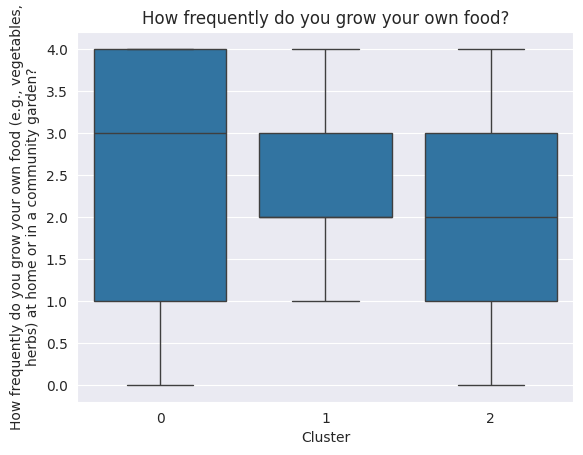

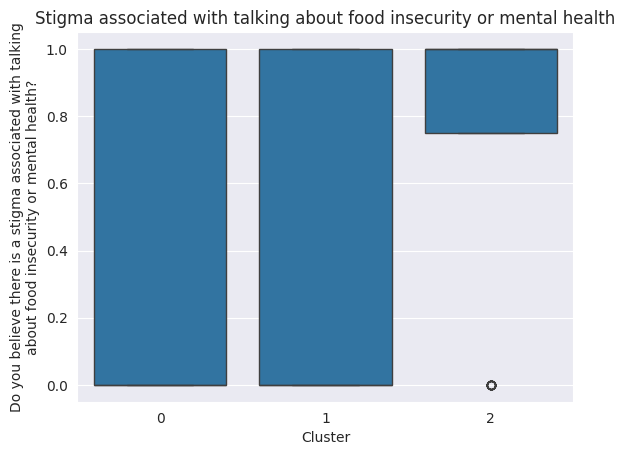

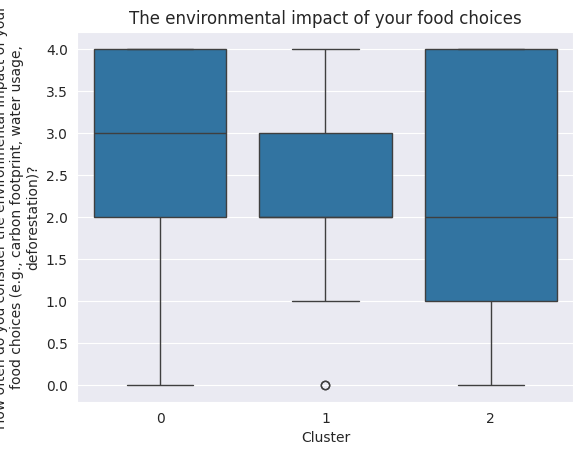

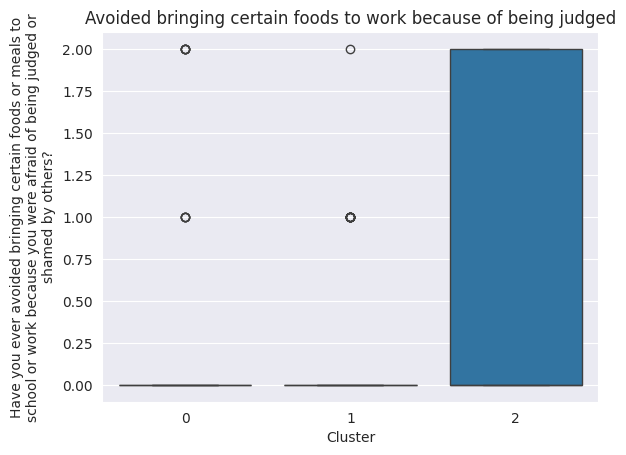

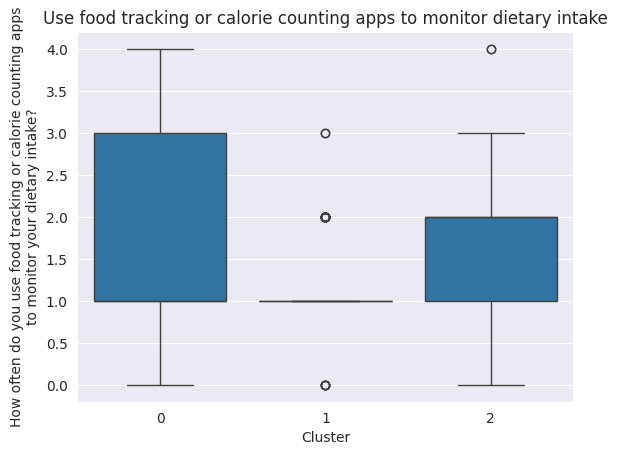

In [70]:
# Visualize the distribution of app usage across clusters
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster',
            y='Are you willing to pay a premium for food products that are produced in an environmentally sustainable manner?', data=data_numerical)
plt.title('Willing to pay a premium for food products')
plt.ylabel('Are you willing to pay a premium for food products that are produced in an environmentally sustainable manner?',wrap=True)
plt.show()

# Visualize concern for food justice across clusters
# plt.figure(figsize=(14, 6))
sns.boxplot(x='Cluster',
            y='How frequently do you grow your own food (e.g., vegetables, herbs) at home or in a community garden?', data=data_numerical)
plt.title('How frequently do you grow your own food?')
plt.ylabel('How frequently do you grow your own food (e.g., vegetables, herbs) at home or in a community garden?',wrap=True)
plt.show()

# plt.figure(figsize=(14, 6))
sns.boxplot(x='Cluster',
            y='Do you believe there is a stigma associated with talking about food insecurity or mental health?', data=data_numerical)
plt.title('Stigma associated with talking about food insecurity or mental health')
plt.ylabel('Do you believe there is a stigma associated with talking about food insecurity or mental health?',wrap=True)
plt.show()

# plt.figure(figsize=(14, 6))
sns.boxplot(x='Cluster',
            y='How often do you consider the environmental impact of your food choices (e.g., carbon footprint, water usage, deforestation)?', data=data_numerical)
plt.title('The environmental impact of your food choices')
plt.ylabel('How often do you consider the environmental impact of your food choices (e.g., carbon footprint, water usage, deforestation)?',wrap=True)
plt.show()

# plt.figure(figsize=(14, 6))
sns.boxplot(x='Cluster',
            y='Have you ever avoided bringing certain foods or meals to school or work because you were afraid of being judged or shamed by others?', data=data_numerical)
plt.title('Avoided bringing certain foods to work because of being judged')
plt.ylabel('Have you ever avoided bringing certain foods or meals to school or work because you were afraid of being judged or shamed by others?',wrap=True)
plt.show()

# plt.figure(figsize=(14, 6))
sns.boxplot(x='Cluster',
            y='How often do you use food tracking or calorie counting apps to monitor your dietary intake?', data=data_numerical)
plt.title('Use food tracking or calorie counting apps to monitor dietary intake')
plt.ylabel('How often do you use food tracking or calorie counting apps to monitor your dietary intake?',wrap=True)
plt.show()


In [71]:
# Explore the behavioral patterns within each cluster (e.g., dietary restrictions, food app usage)
behavioral_summary = data_numerical.groupby('Cluster').agg({
    'Do you use online grocery delivery services or food ordering apps?': 'mean',  # Change to your actual column name
    'Do you believe that food justice and equity should be a priority for government policies?': 'mean'  # Change to your actual column name
})

behavioral_summary


,Do you use online grocery delivery services or food ordering apps?,Do you believe that food justice and equity should be a priority for government policies?
Cluster,,
0,0.606061,1.717172
1,0.181818,1.818182
2,0.593750,1.828125


# Regression Analysis

In [73]:
data_numerical=data_numerical.drop(['Cluster'],axis=1)
data_numerical.head()

,Age,Area of Residence,What is your Annual Income?,"On average, how much of your monthly income do you allocate towards purchasing food?",What factors influence your decision to choose locally sourced food products? (Select all that apply),"Do you follow any specific dietary restrictions or guidelines (e.g., vegetarian, vegan, gluten-free)?",How often do you feel that the food you have access to is of poor quality or has insufficient nutritional value?,How frequently do you skip meals due to financial constraints or lack of access to food?,Have you or your family members ever benefited from government food assistance programs such as the Public Distribution System (PDS) or the Mid-Day Meal Scheme?,"How often do you participate in community events or activities related to food (e.g., food drives, community meals)?",...,How often do you use food tracking or calorie counting apps to monitor your dietary intake?,Do you believe that technology has positively or negatively impacted people's overall relationship with food?,"How often do you engage with food-related content on streaming platforms (e.g., cooking shows, food documentaries)?","How often do you use technology (e.g., smart kitchen appliances, cooking apps) to assist you in meal preparation or cooking?",How knowledgeable do you feel about the connection between nutrition and mental health?,Do you believe there is a stigma associated with talking about food insecurity or mental health?,"Have you ever sought professional help or counseling for mental health concerns related to food, such as disordered eating or emotional eating?",Do you think mental health support services should include resources or programs specifically addressing the relationship between food and mental well-being?,Gender,Educational Qualification
0,21,3,0,4,17,2,3,0,0,3,...,3,0,2,3,1,1,0,0,0,0
1,21,2,4,3,11,2,3,0,0,1,...,3,0,2,2,3,0,0,2,1,2
2,19,3,4,0,17,0,3,0,0,1,...,1,0,4,3,3,1,0,3,1,3
3,20,3,4,1,4,1,2,3,0,2,...,2,0,2,3,2,0,0,2,1,0
4,21,3,4,0,14,0,4,2,0,4,...,4,2,2,4,3,1,0,0,1,3


Column Number to Column Name Mapping:
0: Age
1: Area of Residence
2: What is your Annual Income?
3: On average, how much of your monthly income do you allocate towards purchasing food?
4: What factors influence your decision to choose locally sourced food products? (Select all that apply)
5: Do you follow any specific dietary restrictions or guidelines (e.g., vegetarian, vegan, gluten-free)?
6: How often do you feel that the food you have access to is of poor quality or has insufficient nutritional value?
7: How frequently do you skip meals due to financial constraints or lack of access to food?
8: Have you or your family members ever benefited from government food assistance programs such as the Public Distribution System (PDS) or the Mid-Day Meal Scheme?
9: How often do you participate in community events or activities related to food (e.g., food drives, community meals)?
10: Do you believe that food justice and equity should be a priority for government policies?
11: How often do yo

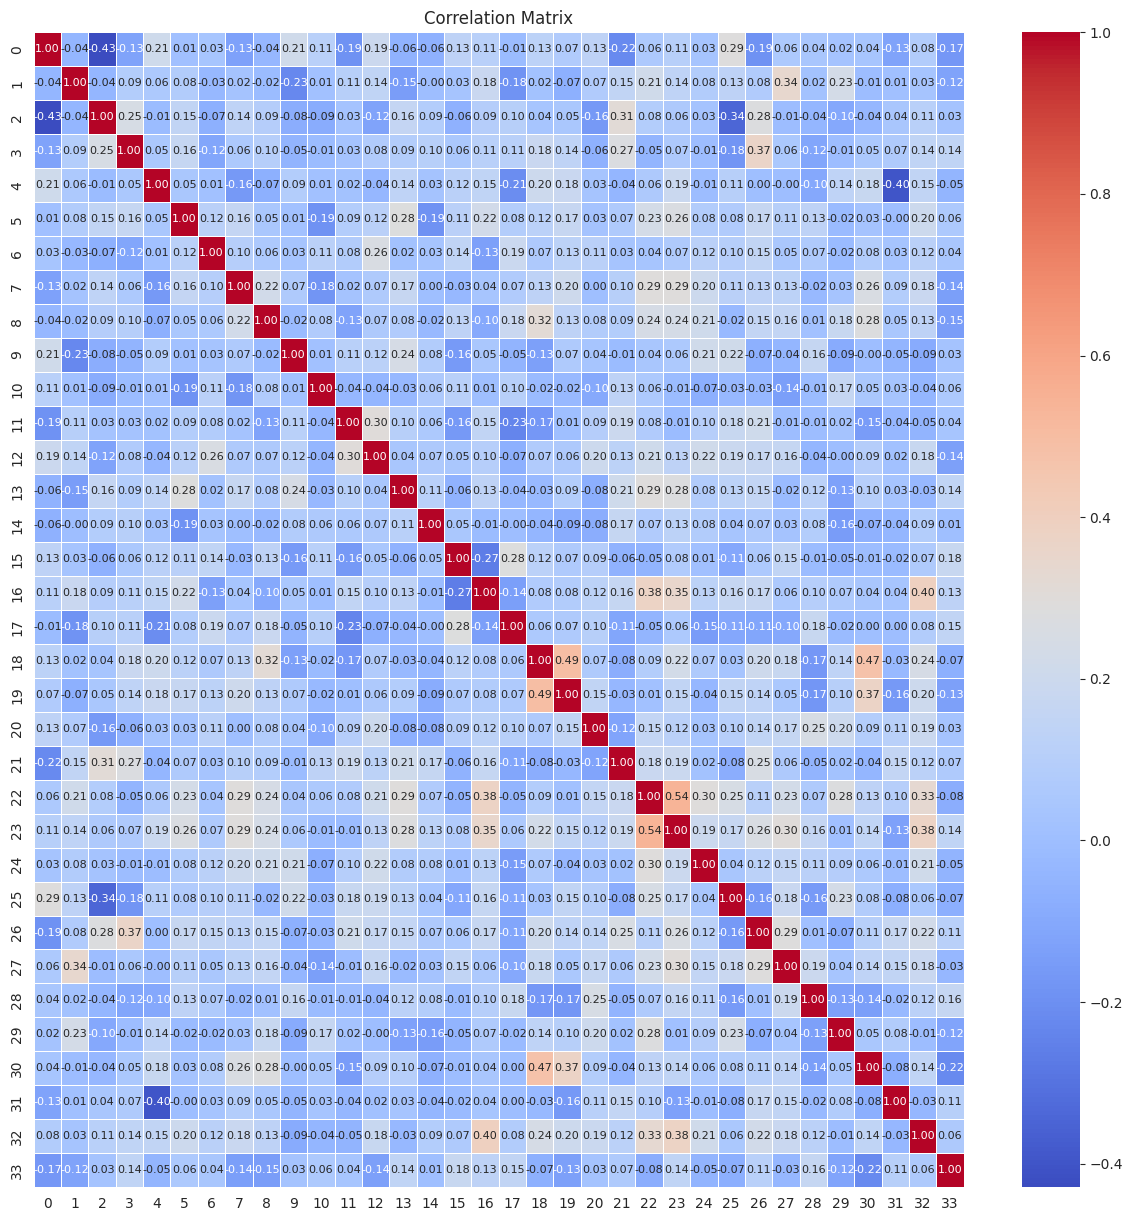

In [74]:
# Assuming 'data' is your DataFrame

heatmap_data = data_numerical.copy()

# Step 1: Rename columns with numbers based on their order
heatmap_data.columns = range(heatmap_data.shape[1])

# Step 1: Create a mapping of column numbers to column names
column_mapping = {i: name for i, name in enumerate(data_numerical.columns)}

# Step 2: Display the mapping
print("Column Number to Column Name Mapping:")
for col_num, col_name in column_mapping.items():
    print(f"{col_num}: {col_name}")

# Plot a correlation matrix to explore relationships between variables
plt.figure(figsize=(15,15))
sns.heatmap(heatmap_data.corr(), annot=True, cmap="coolwarm",linewidth=0.5,fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()


Predicting App Usage:

Dependent Variable: App usage frequency (continuous).


Independent Variables: Age, gender, income, educational qualification, food justice attitudes, eating out frequency.

In [75]:
# Assuming 'data_numerical' is the DataFrame and 'TargetColumn' is the dependent variable

# Step 1: Split the dataset into features (X) and target (y)
X = data_numerical[['Age','Gender', 'What is your Annual Income?', 'Educational Qualification', 'Do you believe that food justice and equity should be a priority for government policies?',
                    'On average, how much of your monthly income do you allocate towards purchasing food?']]  # Replace 'TargetColumn' with your actual target column
y = data_numerical['Do you use online grocery delivery services or food ordering apps?']

# Step 2: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Add a constant to the model (for intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_sm).fit()

# Print the detailed summary
print(model.summary())


                                                    OLS Regression Results                                                    
Dep. Variable:     Do you use online grocery delivery services or food ordering apps?   R-squared:                       0.116
Model:                                                                            OLS   Adj. R-squared:                  0.092
Method:                                                                 Least Squares   F-statistic:                     4.816
Date:                                                                Mon, 14 Oct 2024   Prob (F-statistic):           0.000122
Time:                                                                        16:24:13   Log-Likelihood:                -147.69
No. Observations:                                                                 227   AIC:                             309.4
Df Residuals:                                                                     220   BIC:                   

Predicting Attitudes Towards Food Justice:

Dependent Variable: Food justice concern (Likert scale or continuous).


Independent Variables: Income, education level, use of organic food, app usage frequency, gender.

In [76]:
# Step 1: Split the dataset into features (X) and target (y)
X = data_numerical[['Age','Gender', 'What is your Annual Income?', 'Educational Qualification',
                    'Have you experienced discrimination based on caste, ethnicity, or socio-economic status when accessing food resources?',
                    'How comfortable do you feel expressing your dietary preferences or restrictions in social settings (e.g., family gatherings, social events)?',
                    'Have you ever avoided bringing certain foods or meals to school or work because you were afraid of being judged or shamed by others?']]  # Replace 'TargetColumn' with your actual target column
y = data_numerical['Do you believe that food justice and equity should be a priority for government policies?']

# Step 2: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Add a constant to the model (for intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_sm).fit()

# Print the detailed summary
print(model.summary())

                                                                OLS Regression Results                                                               
Dep. Variable:     Do you believe that food justice and equity should be a priority for government policies?   R-squared:                       0.034
Model:                                                                                                   OLS   Adj. R-squared:                  0.003
Method:                                                                                        Least Squares   F-statistic:                     1.113
Date:                                                                                       Mon, 14 Oct 2024   Prob (F-statistic):              0.356
Time:                                                                                               16:24:13   Log-Likelihood:                -141.43
No. Observations:                                                                                   

Predicting Amount Spent on Food:

Dependent Variable: Amount spent on food (continuous).

Independent Variables: Income, age, eating out frequency, organic food preference

In [77]:
# Step 1: Split the dataset into features (X) and target (y)
X = data_numerical[['Age','Gender', 'What is your Annual Income?', 'Educational Qualification',
                    'How frequently do you grow your own food (e.g., vegetables, herbs) at home or in a community garden?',
                    'How knowledgeable do you feel about the connection between nutrition and mental health?',
                    'Have you ever sought professional help or counseling for mental health concerns related to food, such as disordered eating or emotional eating?']]  # Replace 'TargetColumn' with your actual target column
y = data_numerical['On average, how much of your monthly income do you allocate towards purchasing food?']

# Step 2: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Add a constant to the model (for intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_sm).fit()

# Print the detailed summary
print(model.summary())

                                                             OLS Regression Results                                                             
Dep. Variable:     On average, how much of your monthly income do you allocate towards purchasing food?   R-squared:                       0.105
Model:                                                                                              OLS   Adj. R-squared:                  0.076
Method:                                                                                   Least Squares   F-statistic:                     3.654
Date:                                                                                  Mon, 14 Oct 2024   Prob (F-statistic):           0.000945
Time:                                                                                          16:24:13   Log-Likelihood:                -350.48
No. Observations:                                                                                   227   AIC:                    